# Steps
1. Choose data scenario.
2. Generate the dataset accordingly.
5. Choose 'fixed' configuration.
6. For each 'fixed' configuration, optimize the other parameters based on RMSE.
7. Given optimal setting, run popularity bias analysis for every version of the 'fixed' configuration.

## Libraries

In [1]:
%env MKL_THREADING_LAYER=tbb
%env OPENBLAS_NUM_THREADS=24
%env NUMBA_NUM_THREADS=96
%env MKL_NUM_THREADS=96
%env OMP_NUM_THREADS=1

env: MKL_THREADING_LAYER=tbb
env: OPENBLAS_NUM_THREADS=24
env: NUMBA_NUM_THREADS=96
env: MKL_NUM_THREADS=96
env: OMP_NUM_THREADS=1


In [2]:
import os

os.environ["MKL_THREADING_LAYER"] = "tbb"
os.environ["OPENBLAS_NUM_THREADS"] = "24"
os.environ["NUMBA_NUM_THREADS"] = "96"
os.environ["MKL_NUM_THREADS"] = "96"
os.environ["OMP_NUM_THREADS"] = "1"
# for random generation


# basic functions
import pandas as pd

pd.options.display.max_rows = 100
import pickle

# custom-made functions
import modelling_mf
from data_generation import generate_data
from optimize_hp import optimize_lkpy, optimize_cornac

# lenskit RS library
from lenskit.algorithms import user_knn


# cornac RS library
from cornac.models import UserKNN

## Fairbook data and parameters

In [3]:
data = "fairbook"
# user-item interactions
fairbook_ratings = pd.read_csv("data/" + data + "_events.csv")

In [4]:
user_col = "user"  # the name of the column that includes the users
item_col = "item"  # the name of the column that includes the items
predict_col = "rating"  # the name of the column that includes the interaction

## Scenarios

1. There is no general relation between popularity and rating: uniformly_random
2. Popular items are rated higher by the users.: popularity_good
3. Popular items are rated lower by the users.: popilarity_bad
4. Popular items are rated higher by users with big profiles.: popularity_good_for_bp_ur
5. Popular items are rated lower by users with big profiles.: popularity_bad_for_bp_ur

In [5]:
data_strategies = [
    "uniformly_random",
    "popularity_good",
    "popularity_bad",
    "popularity_good_for_bp_ur",
    "popularity_bad_for_bp_ur",
]

## Optimize, train, evaluate LKPY
- **Algorithm**
- **Fixed parameters**
- **To-optimize parameters**

In [6]:
algo_versions = {
    "UserKNN": [
        {"min_nbrs": 1, "min_sim": 0},
        {"min_nbrs": 2, "min_sim": 0},
        {"min_nbrs": 1, "min_sim": -1},
        {"min_nbrs": 2, "min_sim": -1},
        
    ]
}

In [7]:
evaluation_way = "cross_validation"
verbose = False
plot = True
save_plot = True  # save the plots
fallback = False
nr_recs = 10
sampling_strategy = "frac"
partition_way = "user"

uniformly_random {'min_nbrs': 1, 'min_sim': 0}
We got them already
nr of longtail 3277
2.5782848151062154
nr of longtail 3606
2.8349056603773586
nr of longtail 3527
2.777165354330709
nr of longtail 3598
2.830841856805665
nr of longtail 3440
2.7086614173228347


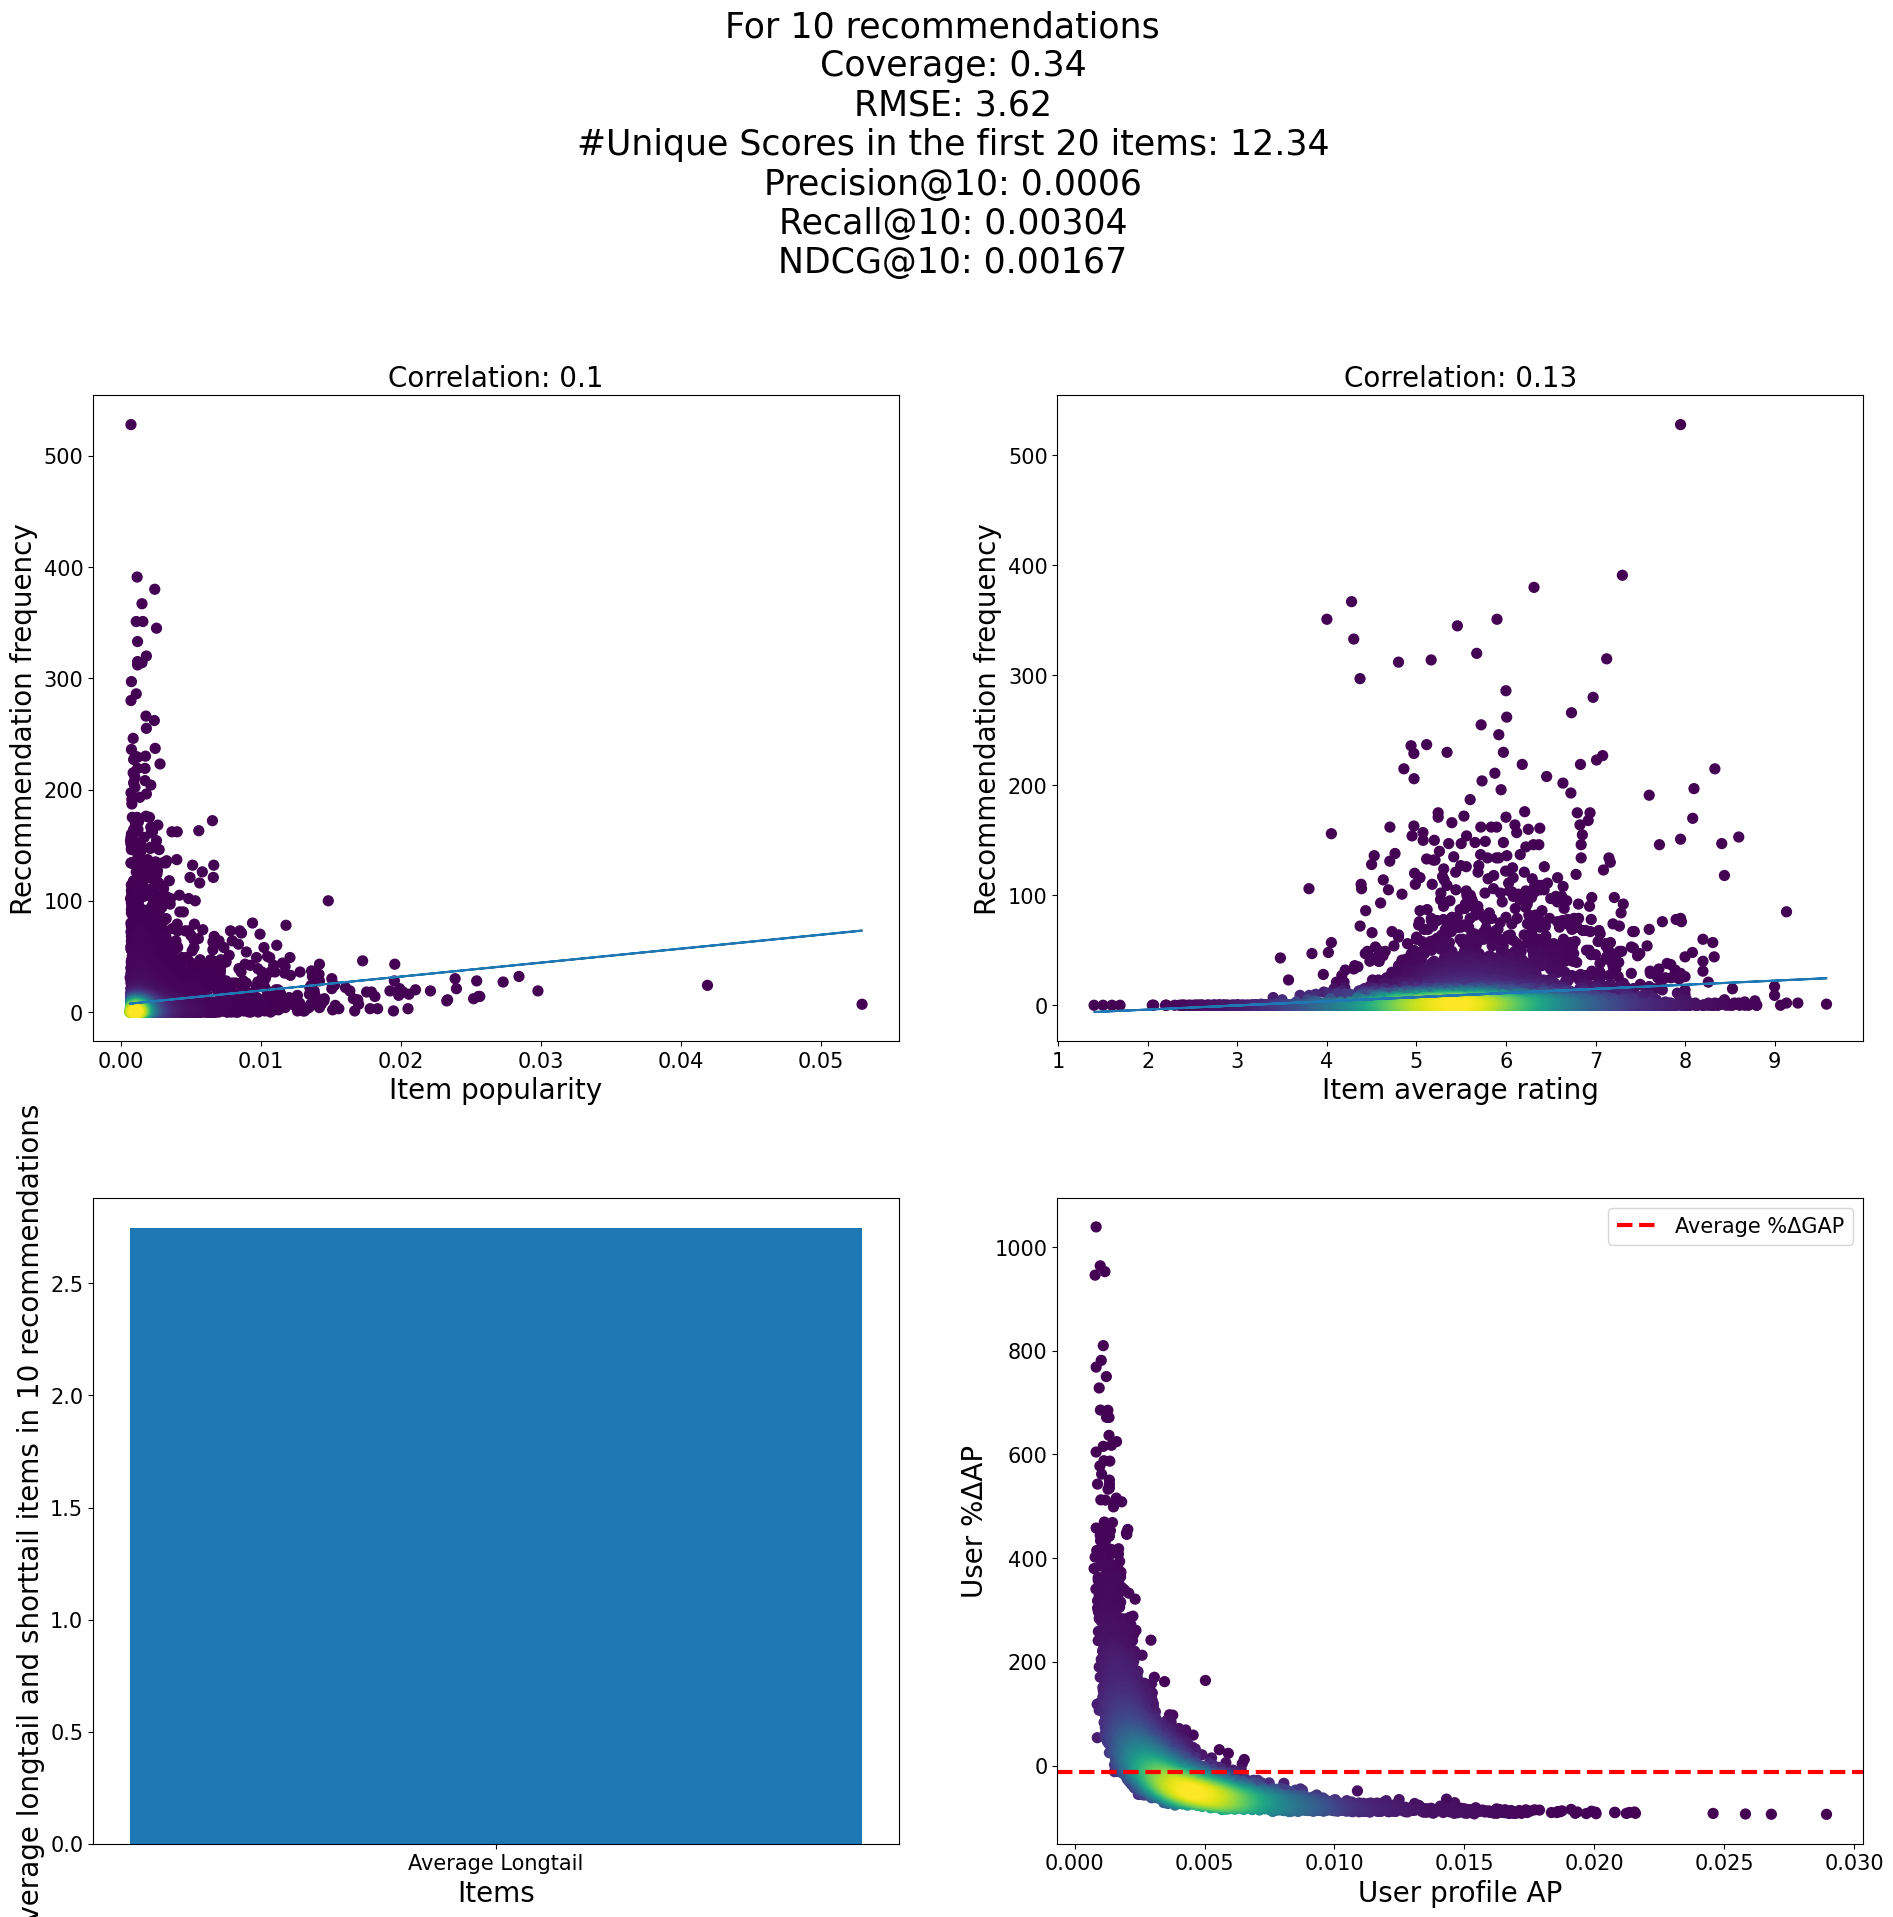

uniformly_random {'min_nbrs': 2, 'min_sim': 0}
We got them already
nr of longtail 1377
1.0833988985051142
nr of longtail 1366
1.074744295830055
nr of longtail 1350
1.0646687697160884
nr of longtail 1336
1.053627760252366
nr of longtail 1375
1.0826771653543308


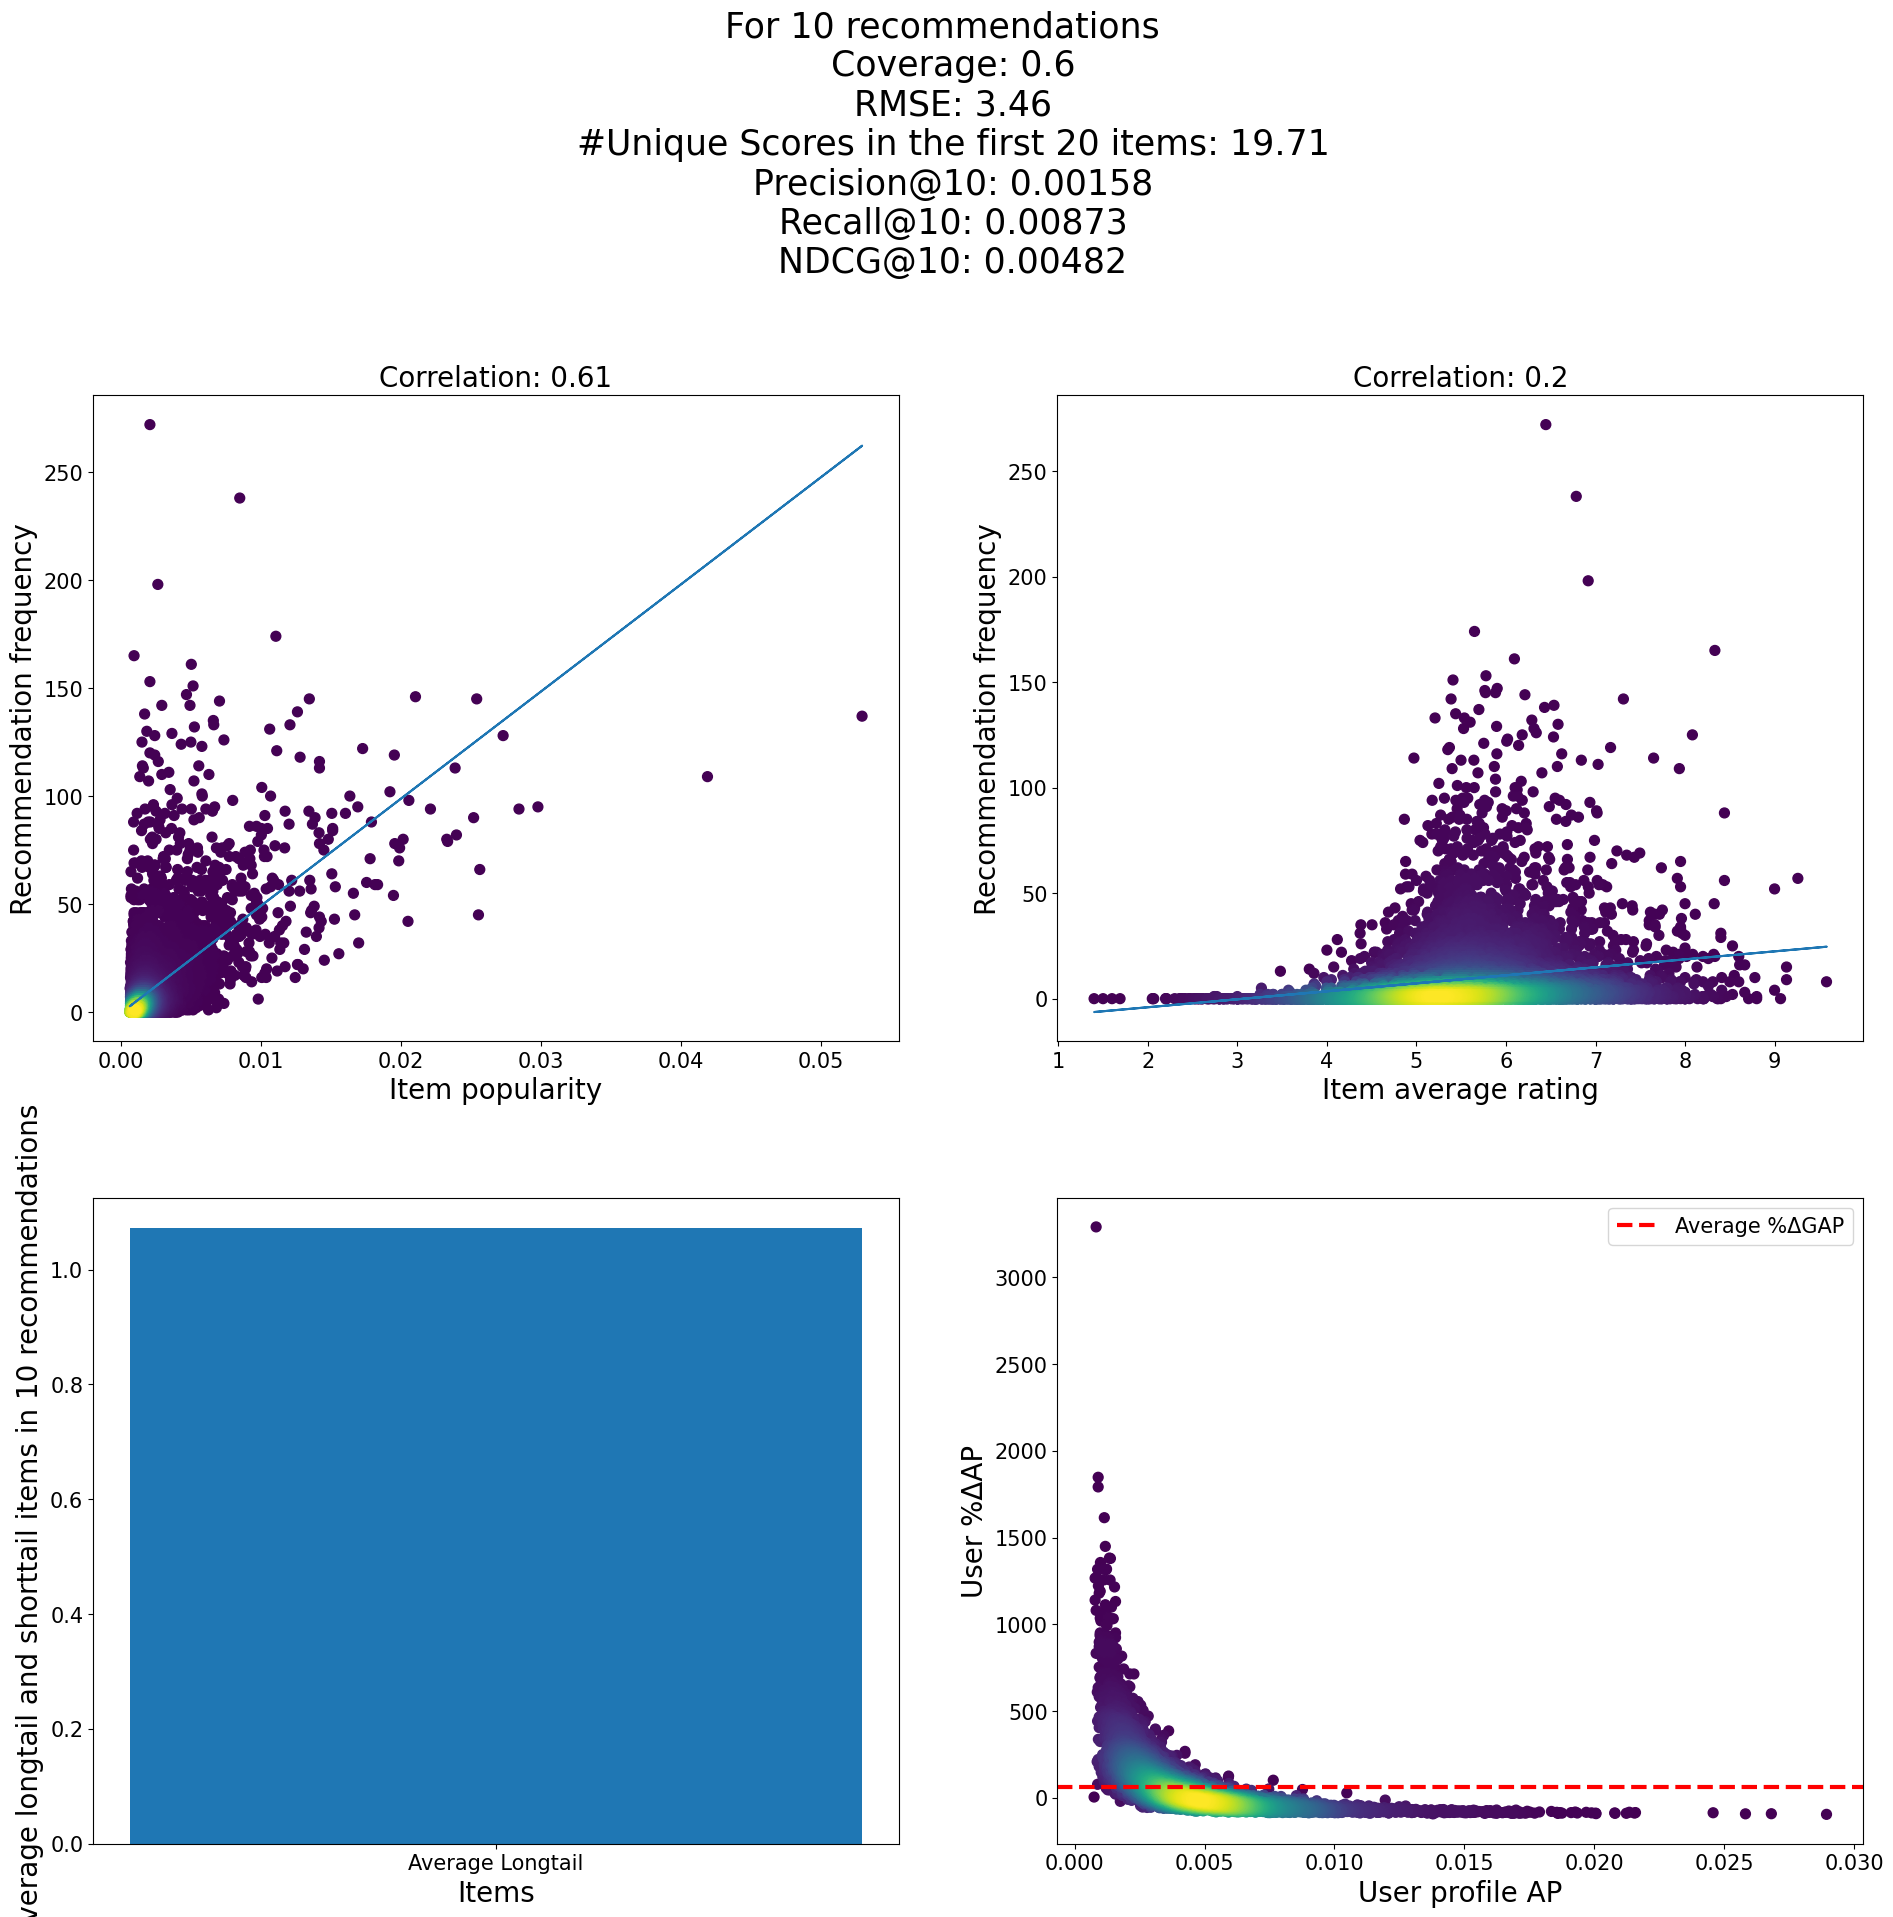

uniformly_random {'min_nbrs': 1, 'min_sim': -1}
We got them already
nr of longtail 4677
3.6797797010228166
nr of longtail 4893
3.8466981132075473
nr of longtail 4749
3.7393700787401576
nr of longtail 4810
3.7844217151848936
nr of longtail 4779
3.762992125984252


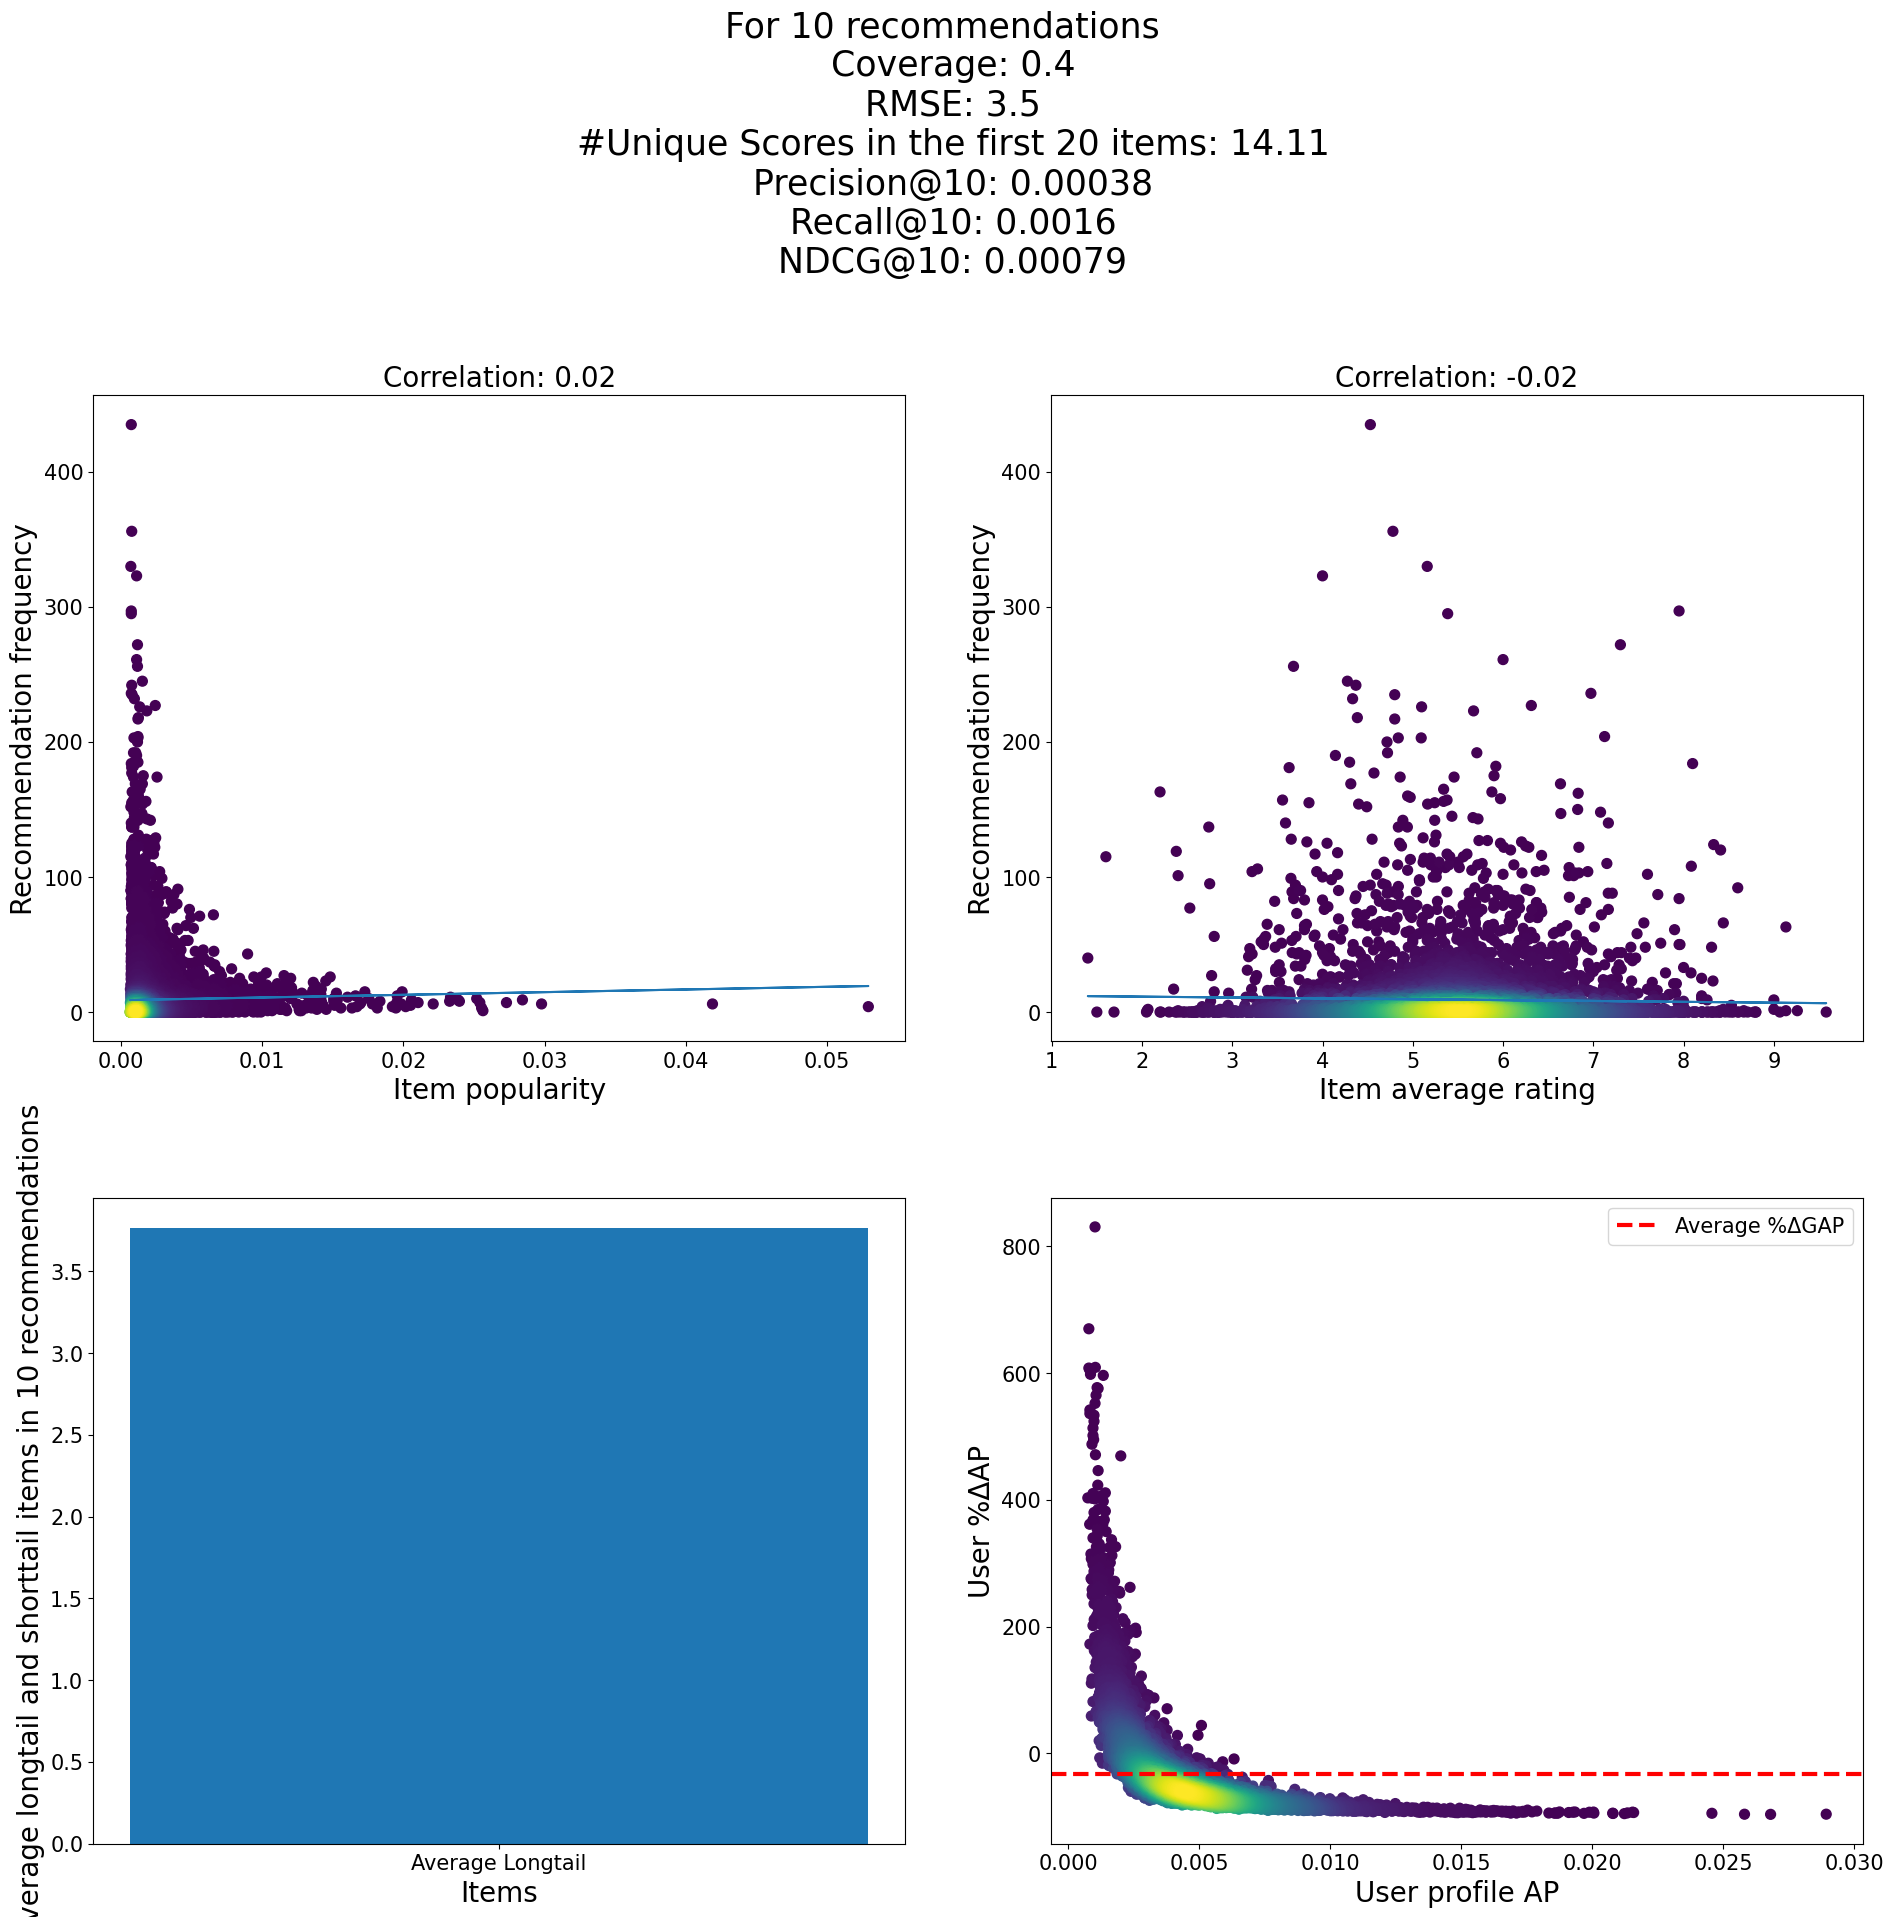

uniformly_random {'min_nbrs': 2, 'min_sim': -1}
We got them already
nr of longtail 2520
1.982690794649882
nr of longtail 2434
1.9135220125786163
nr of longtail 2471
1.9456692913385827
nr of longtail 2405
1.8922108575924468
nr of longtail 2467
1.94251968503937


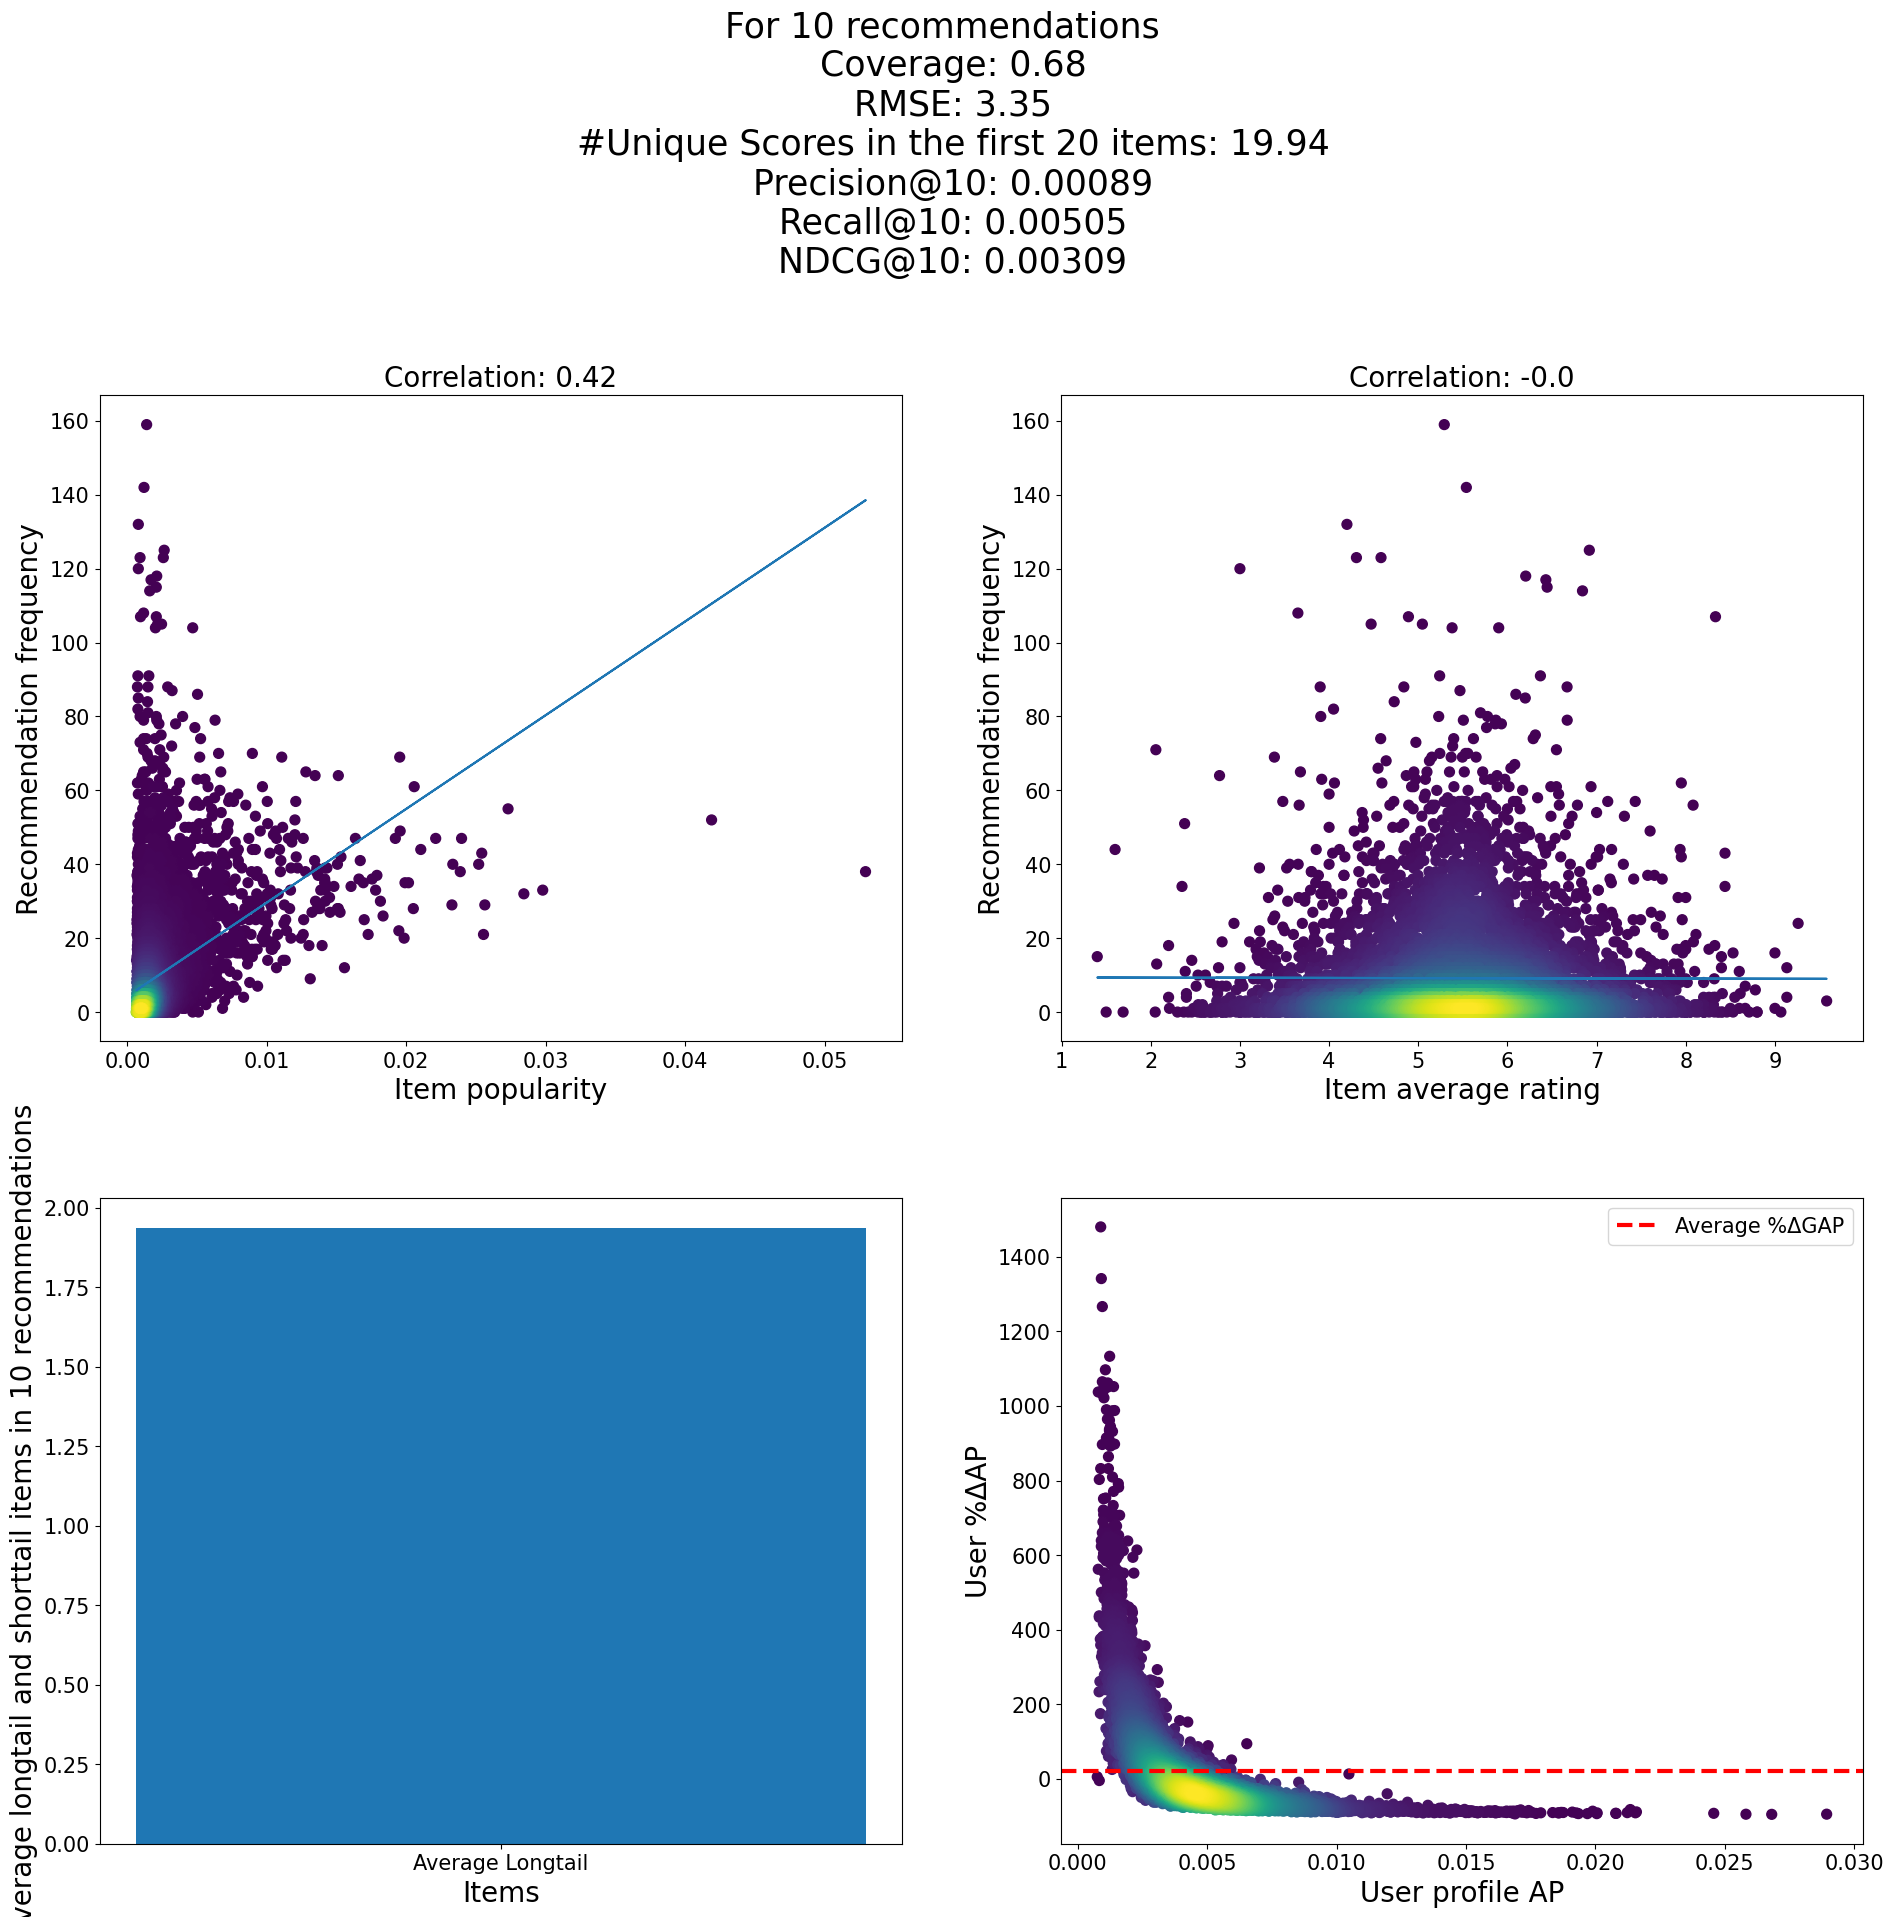

popularity_good {'min_nbrs': 1, 'min_sim': 0}
We got them already
nr of longtail 32
0.02545743834526651
nr of longtail 51
0.0408981555733761
nr of longtail 30
0.02401921537229784
nr of longtail 65
0.05195843325339728
nr of longtail 66
0.052715654952076675


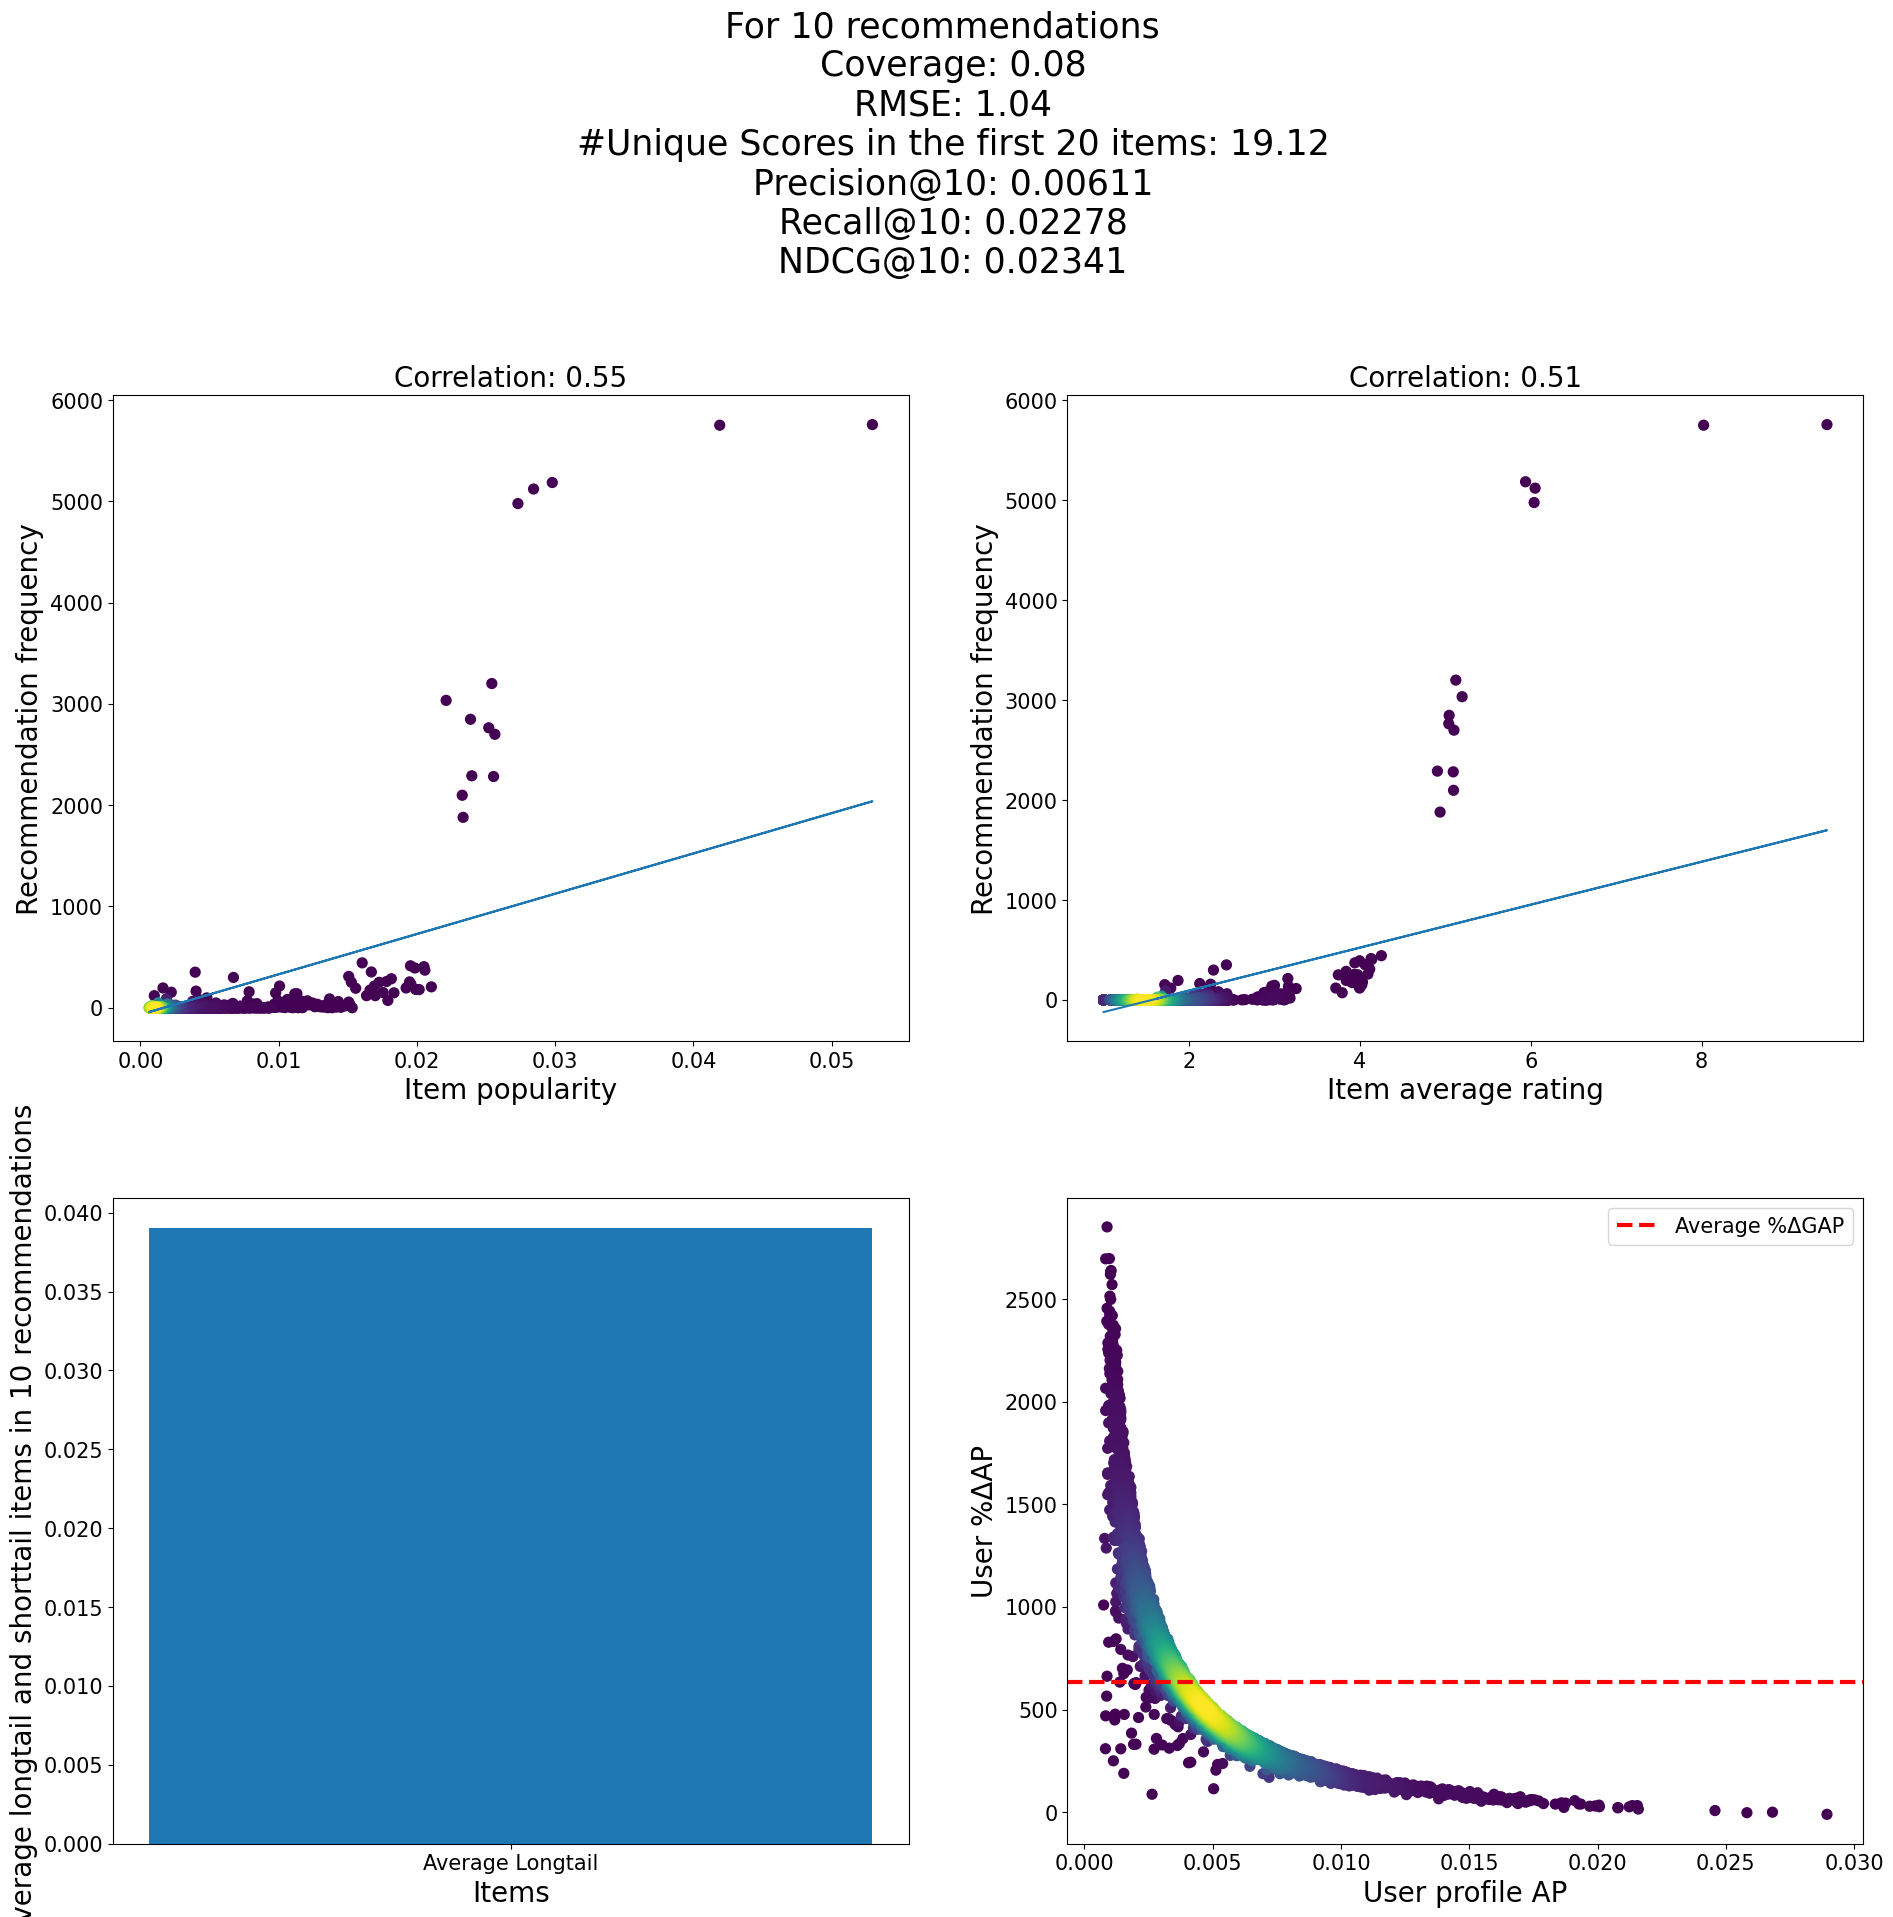

popularity_good {'min_nbrs': 2, 'min_sim': 0}
We got them already
nr of longtail 31
0.024701195219123506
nr of longtail 35
0.028089887640449437
nr of longtail 47
0.03775100401606426
nr of longtail 62
0.04979919678714859
nr of longtail 33
0.0264


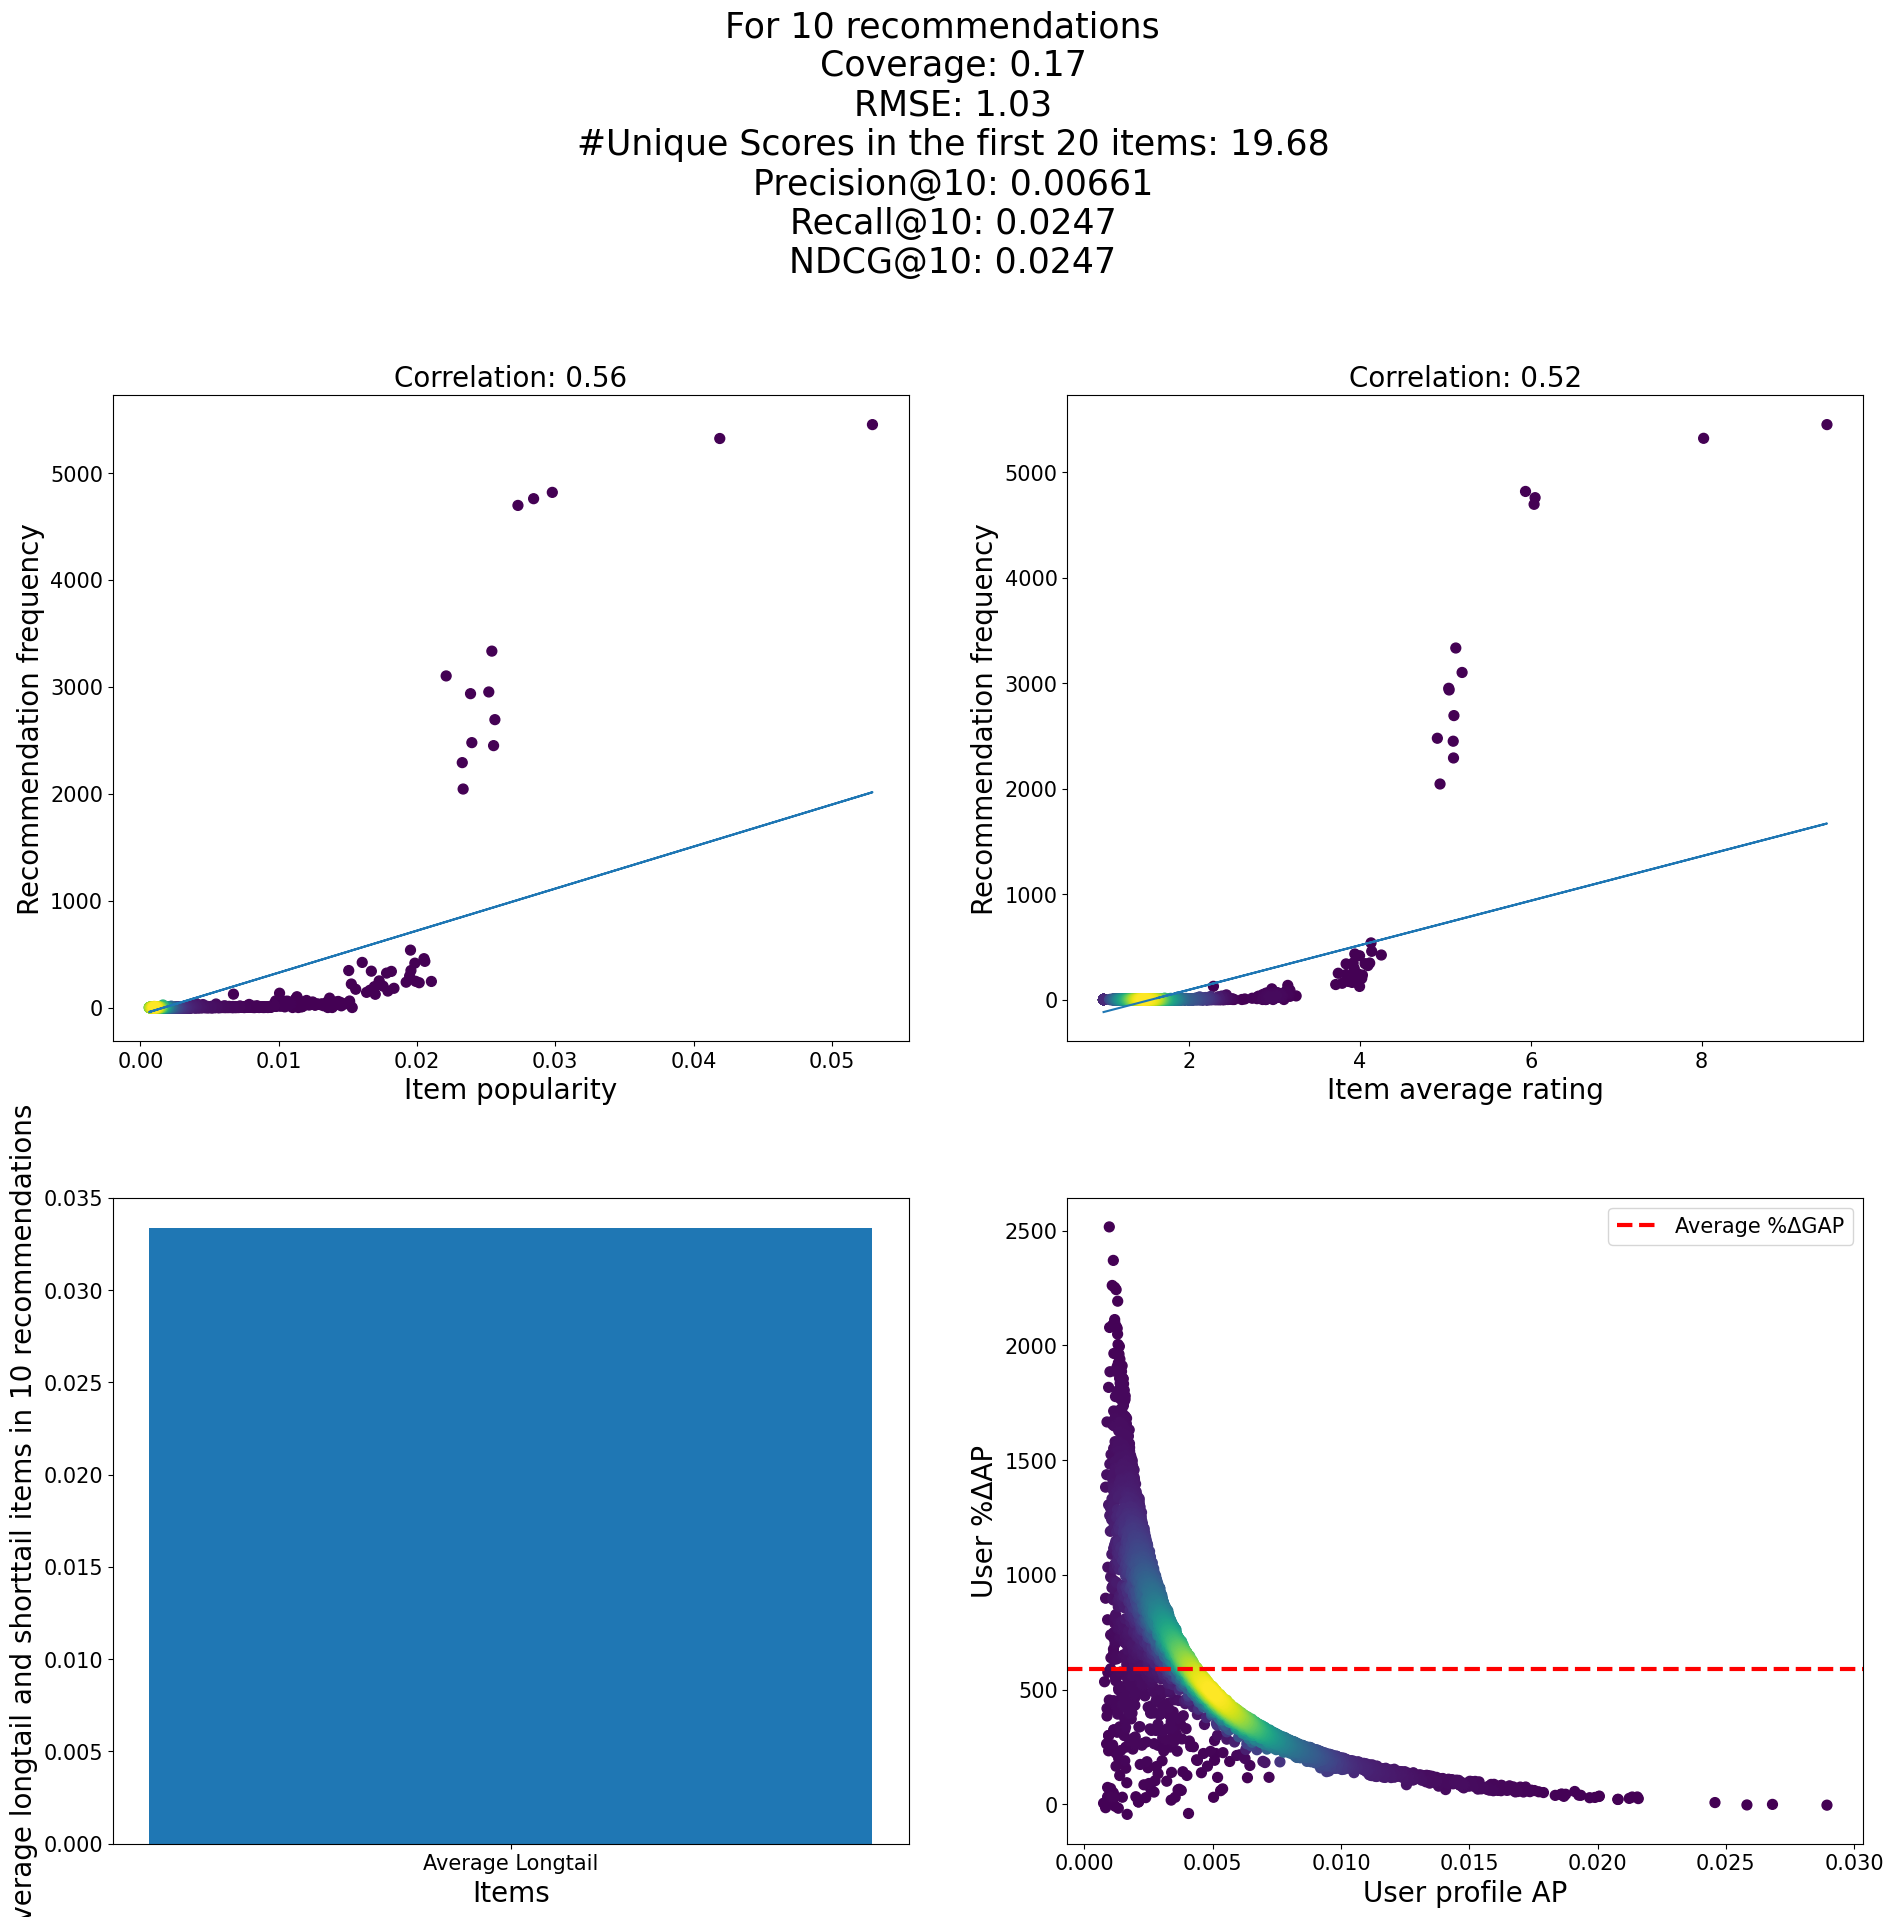

popularity_good {'min_nbrs': 1, 'min_sim': -1}
We got them already
nr of longtail 786
0.6252983293556086
nr of longtail 755
0.6054530874097834
nr of longtail 631
0.5052041633306645
nr of longtail 763
0.609912070343725
nr of longtail 798
0.6373801916932907


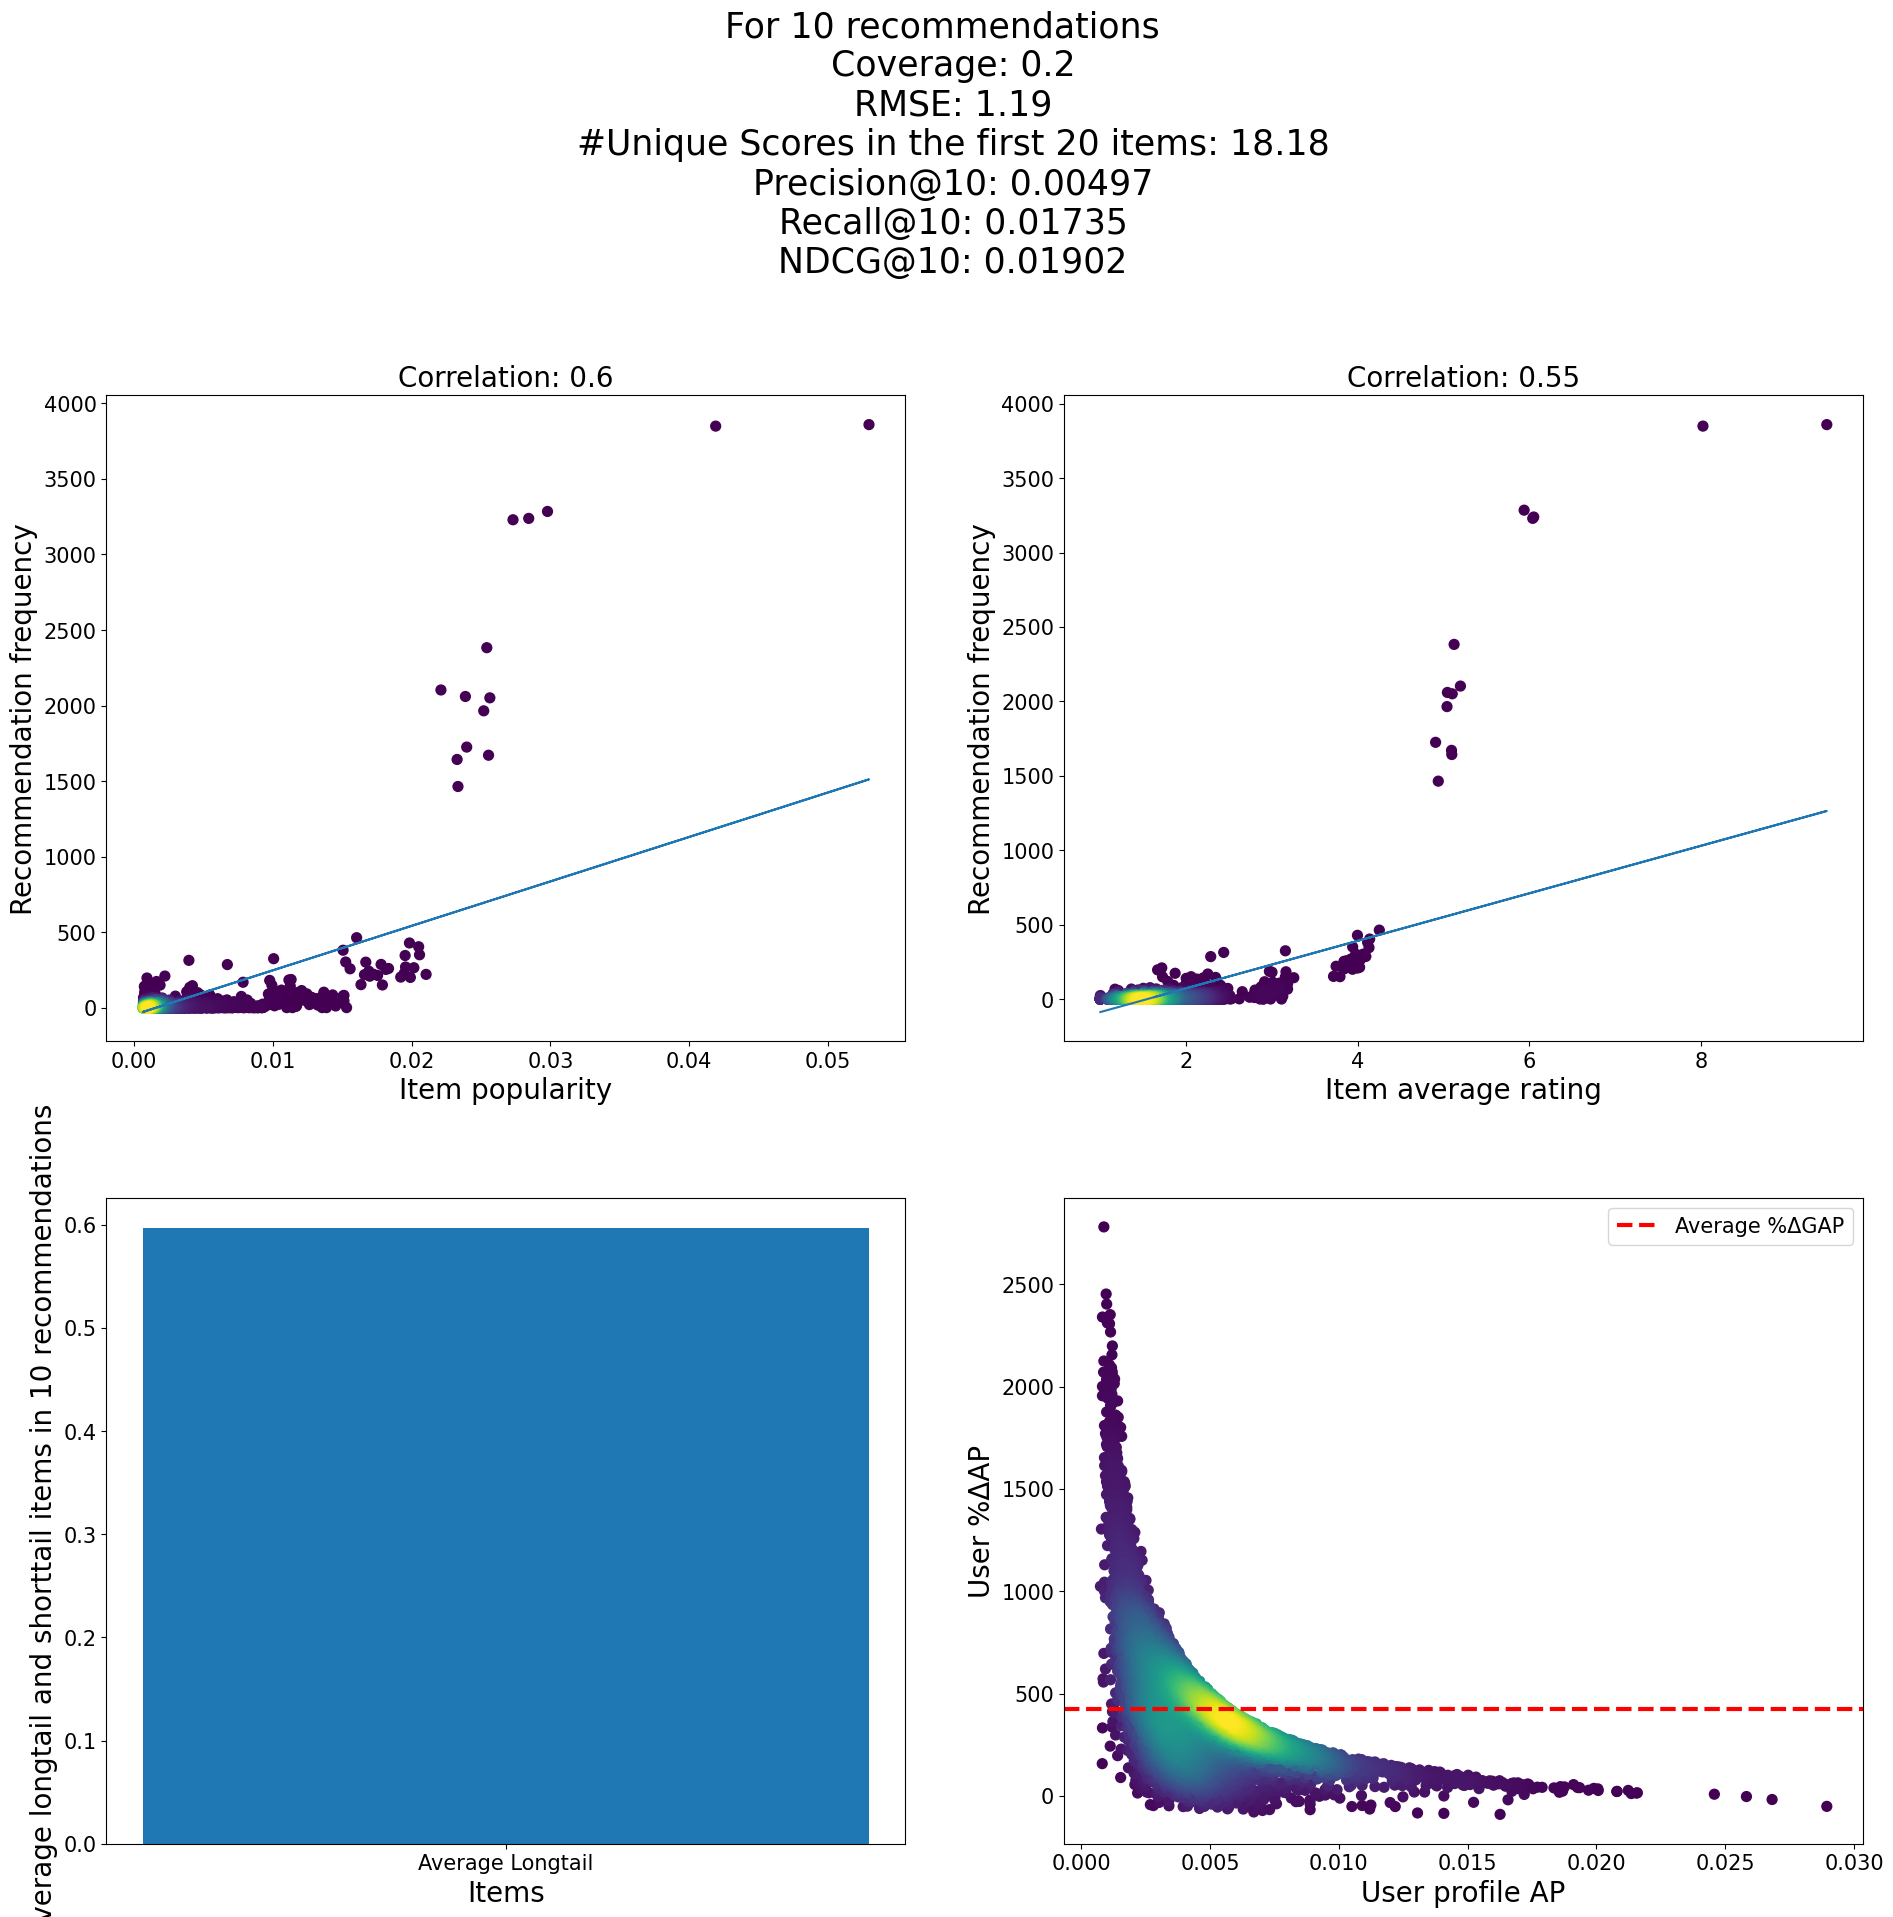

popularity_good {'min_nbrs': 2, 'min_sim': -1}
We got them already
nr of longtail 242
0.19252187748607796
nr of longtail 226
0.18123496391339214
nr of longtail 241
0.19295436349079265
nr of longtail 272
0.21742605915267785
nr of longtail 251
0.20047923322683706


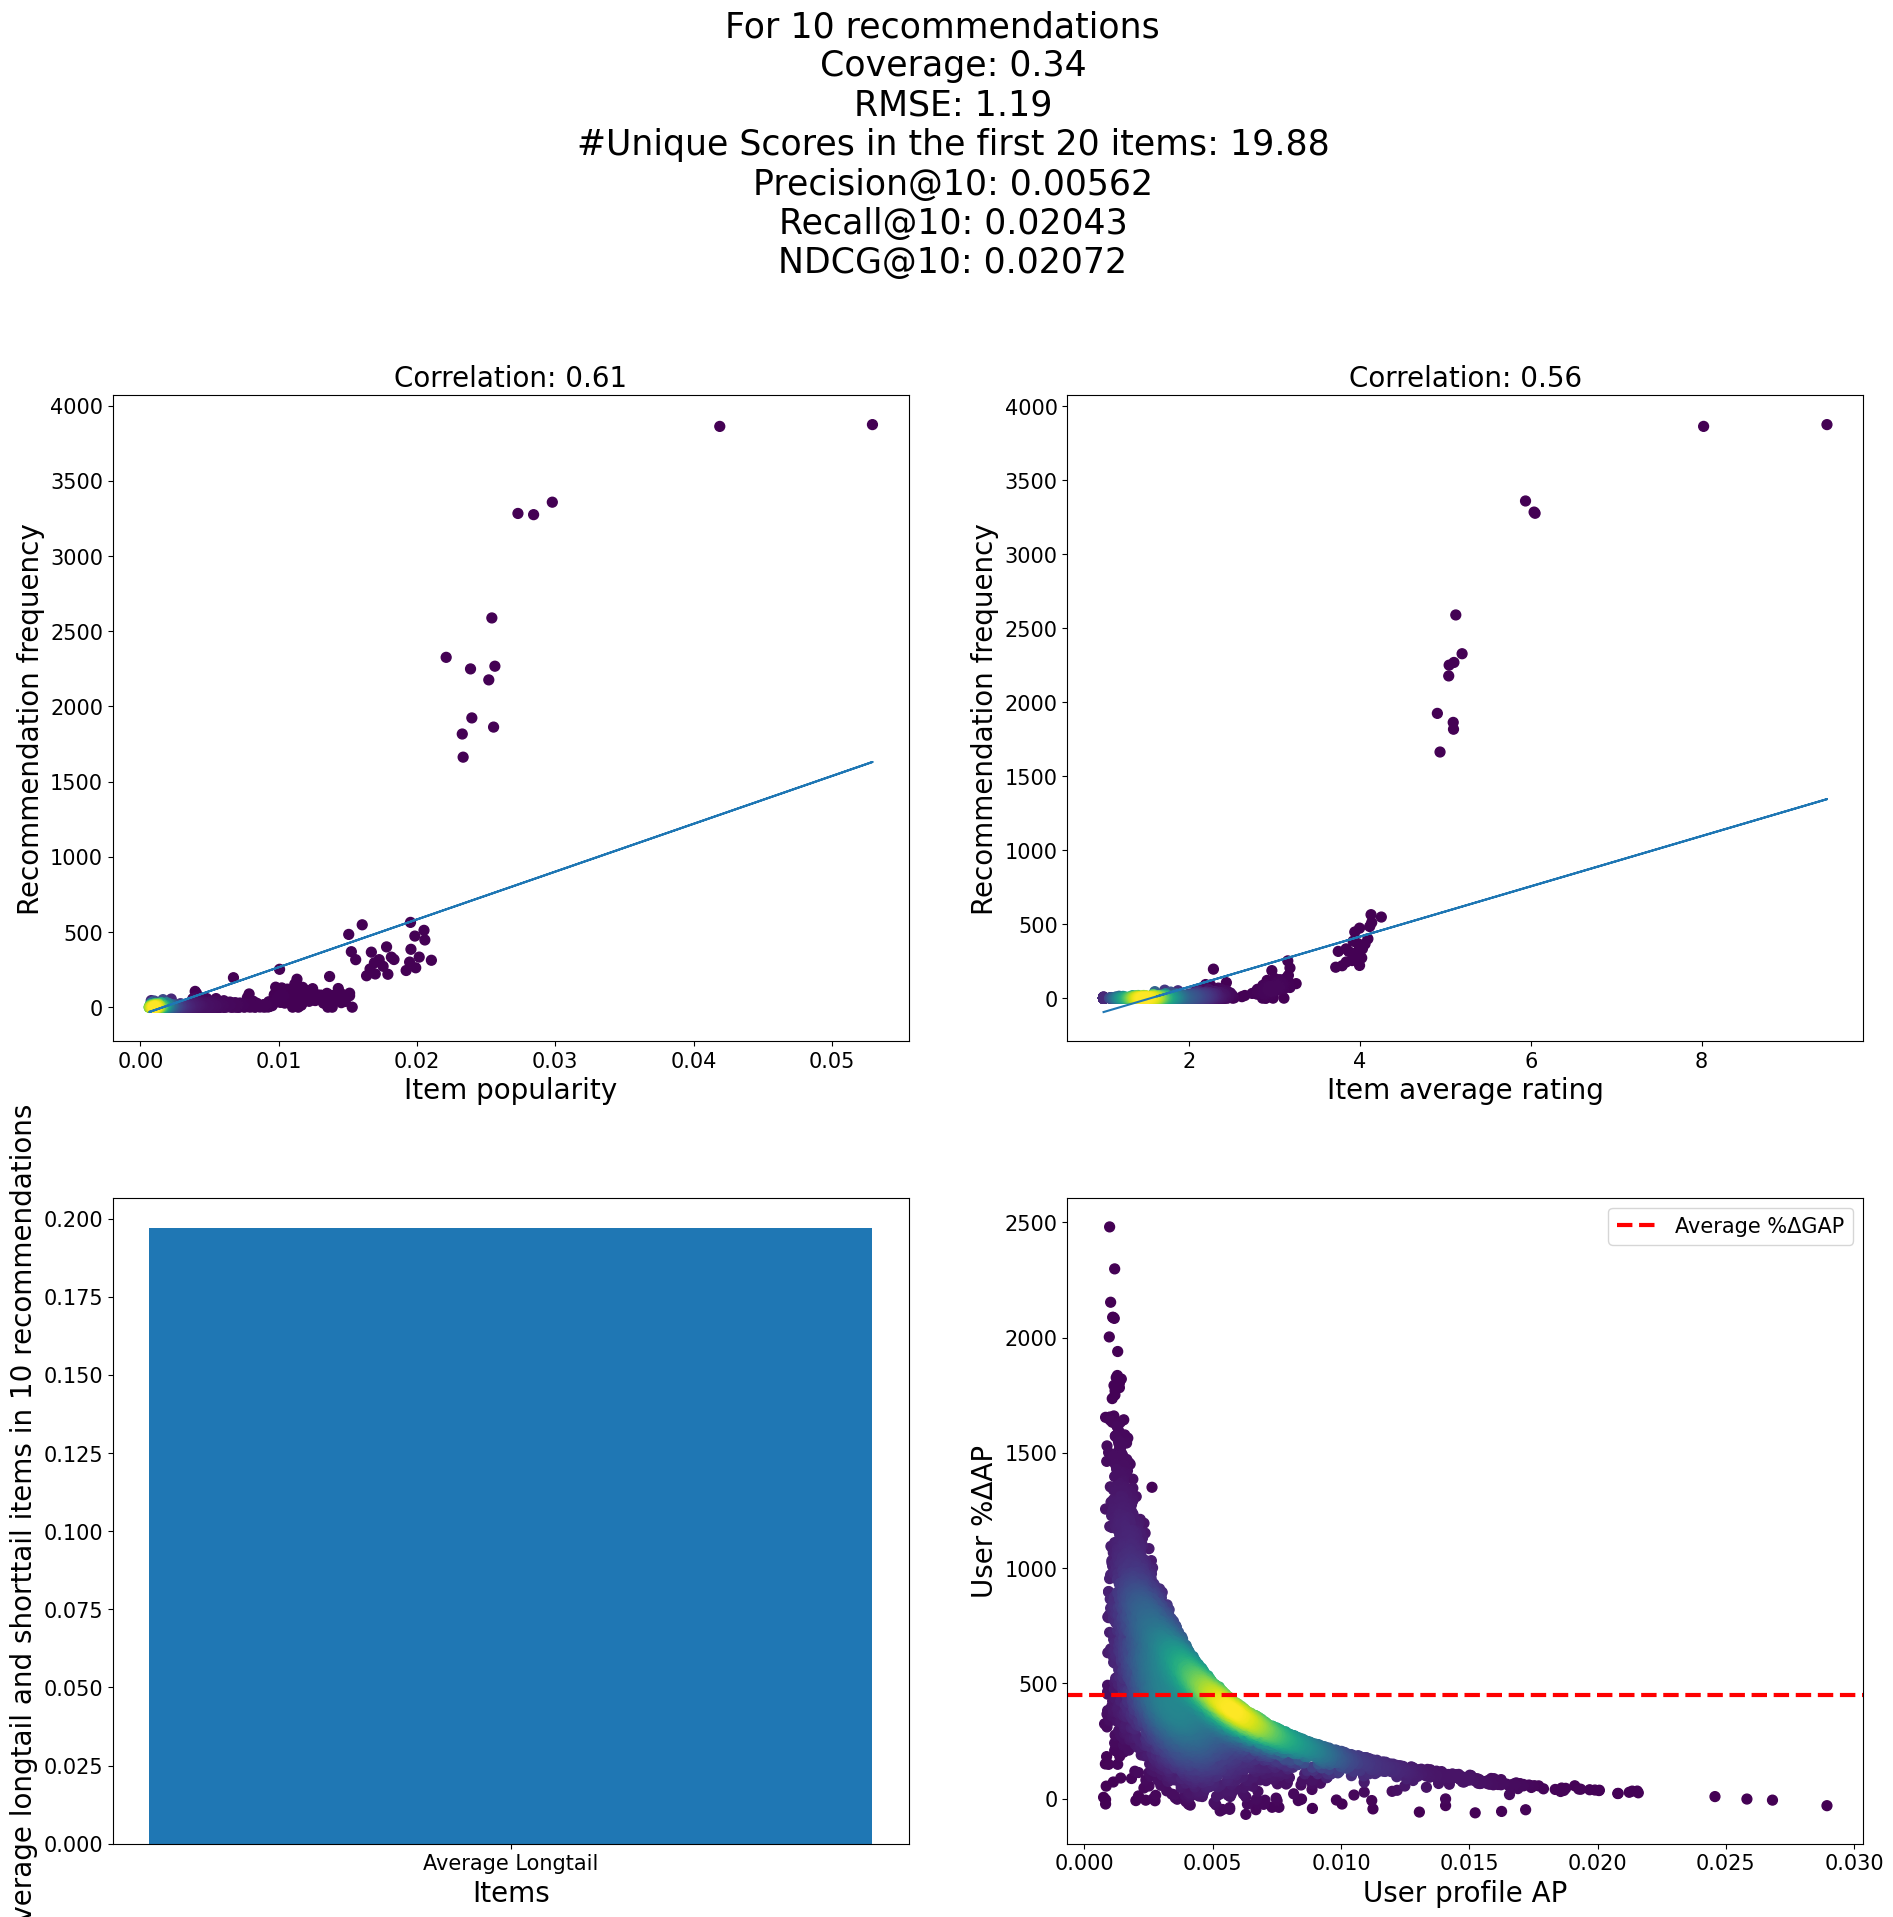

popularity_bad {'min_nbrs': 1, 'min_sim': 0}
We got them already
nr of longtail 3890
3.112
nr of longtail 3685
2.9409417398244213
nr of longtail 3837
3.0476568705321685
nr of longtail 3796
3.015091342335187
nr of longtail 3716
2.9562450278440733


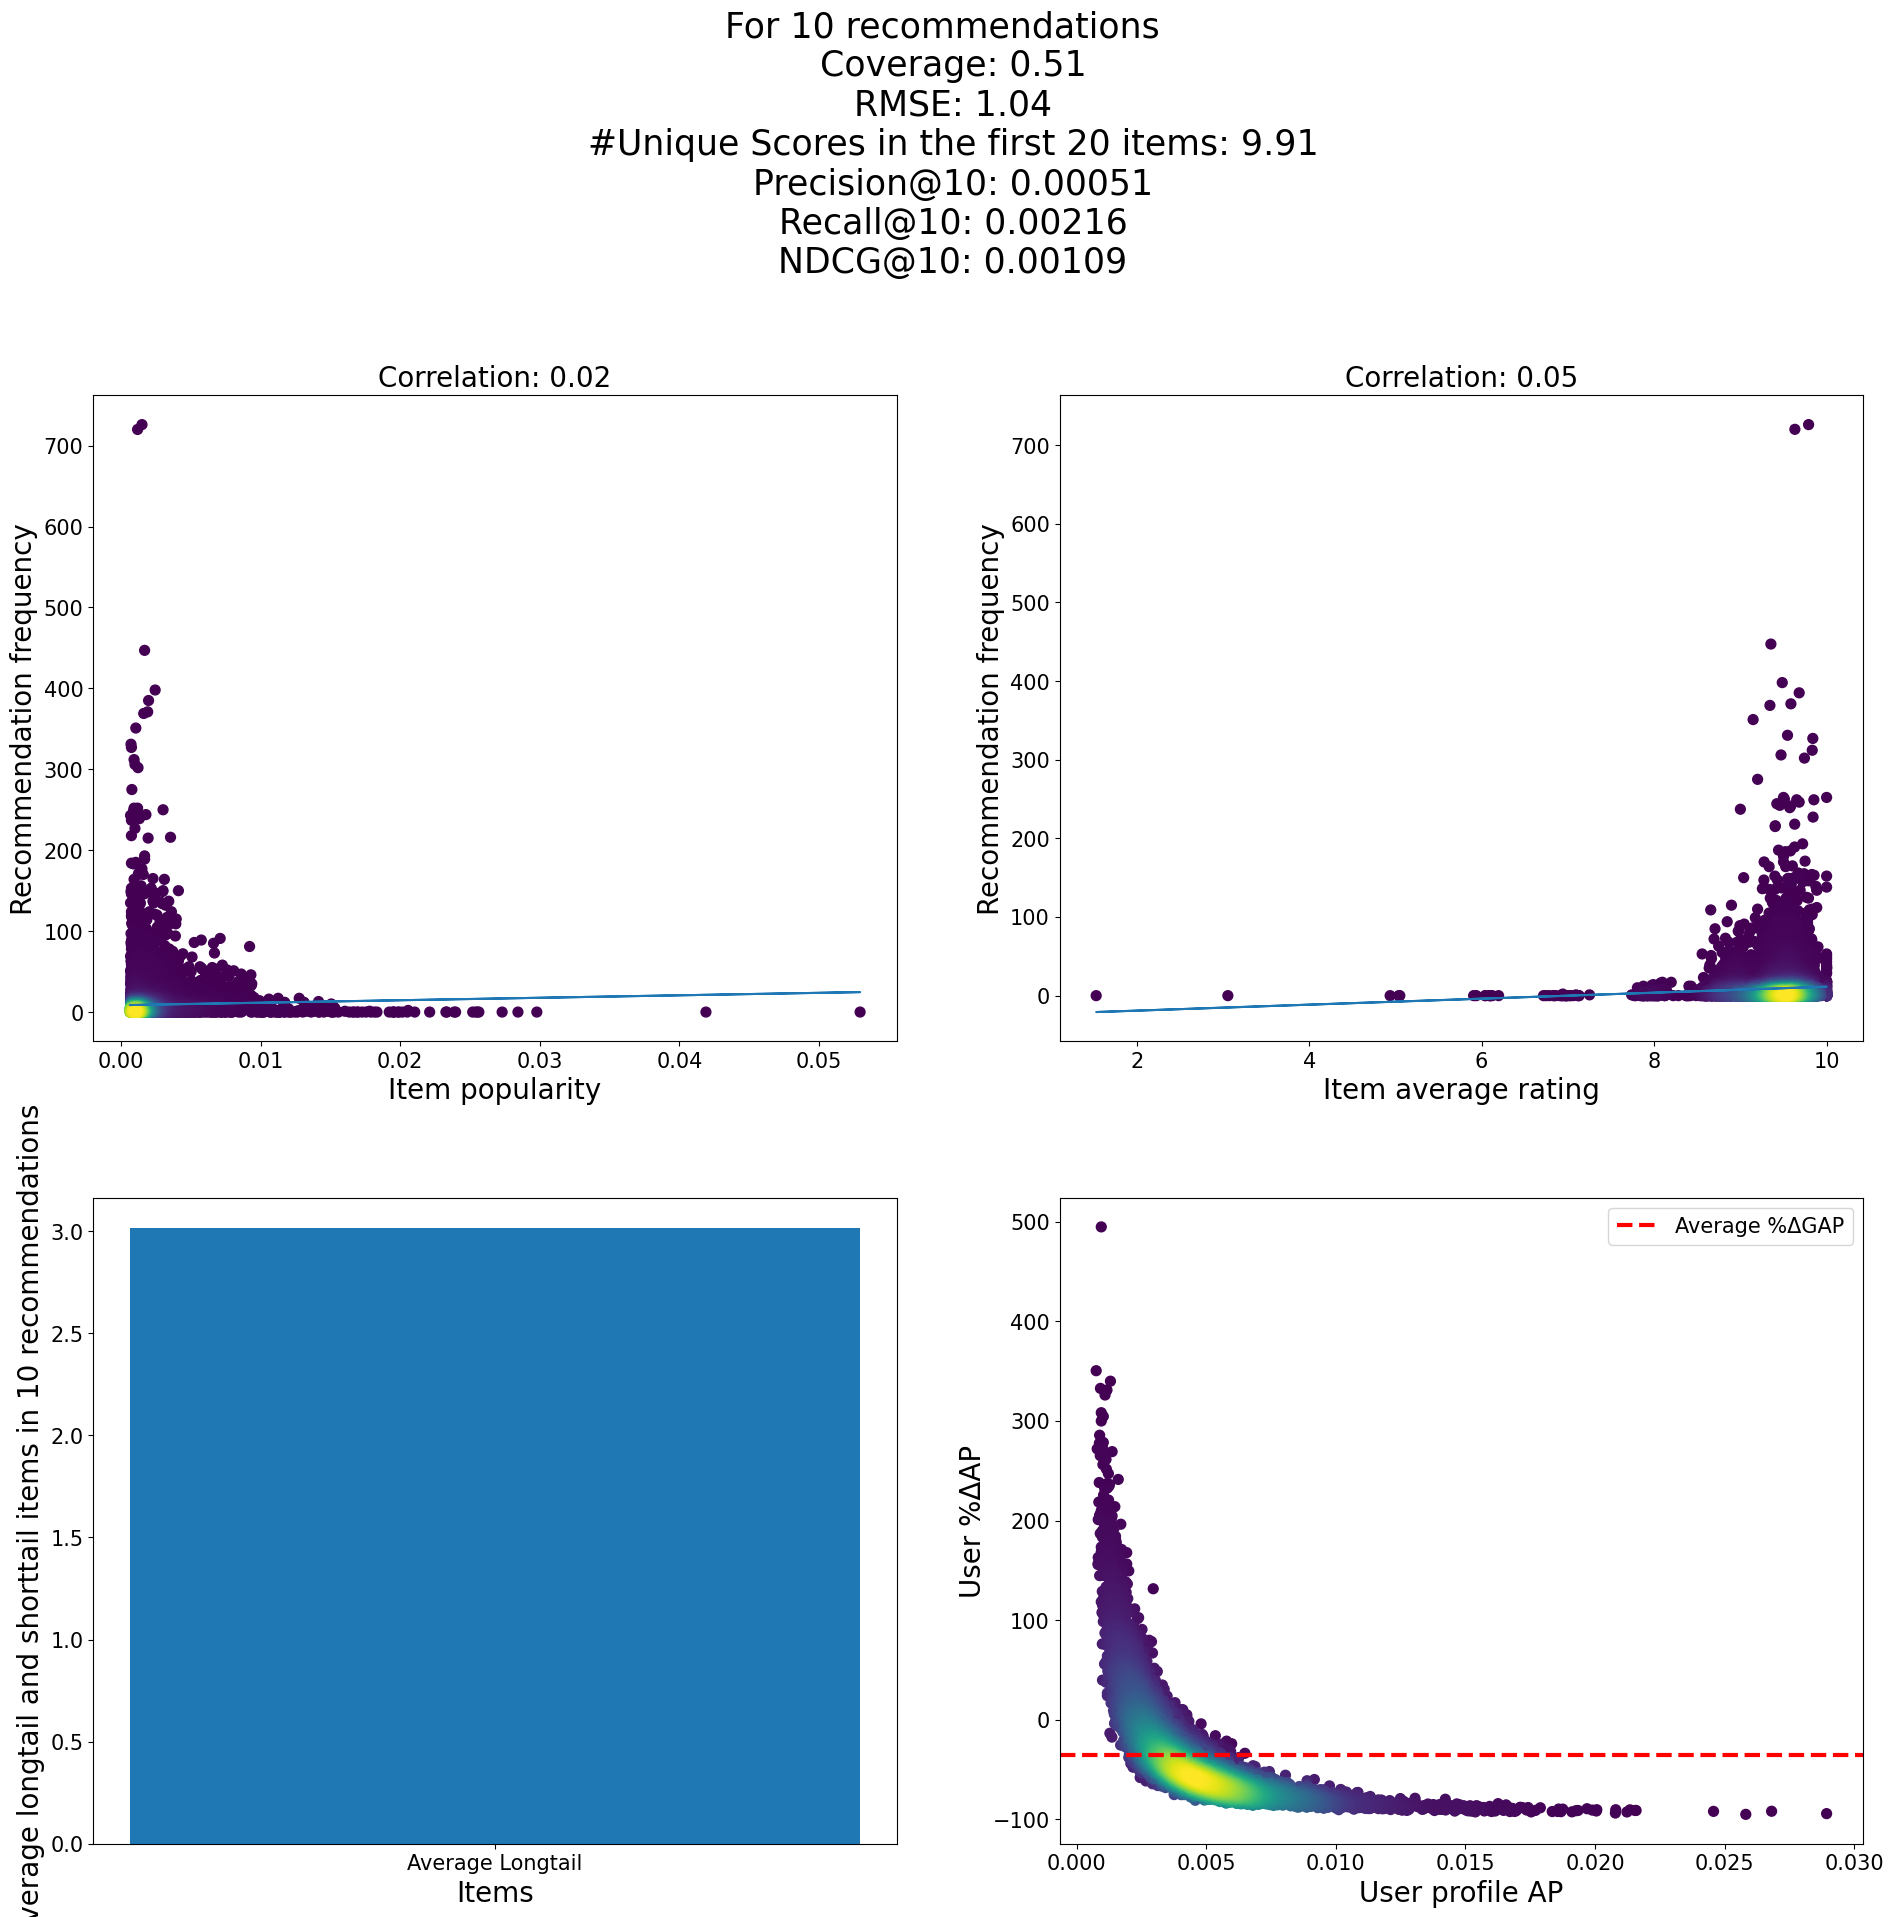

popularity_bad {'min_nbrs': 2, 'min_sim': 0}
We got them already
nr of longtail 2341
1.8728


In [ ]:
# choose algorithm
algorithm_lkpy = user_knn.UserUser
algo_name = "UserKNN"
versions = algo_versions[algo_name]

# for every data strategy
for i in range(len(data_strategies)):
    data_strategy = data_strategies[i]
    # generate the data
    ratings = generate_data(
        strategy=data_strategy, copying_dataset=fairbook_ratings, user_perc=0.2
    )

    # for every 'fixed' version of the algorithm
    for args in versions:
        print(data_strategy, args)

        p = "best_parameters/" + algo_name + "/" + data_strategy + "_" + str(args) + ".pkl"
        if os.path.isfile(p):
            print("We got them already")
            with open(p, "rb") as f:
                best_params = pickle.load(f)
        else:
            print("We have to compute them now")
            # optimize for this fixed version
            best_params = optimize_lkpy(
                ratings=ratings, algorithm_name=algo_name, args=args, max_evals=20, partition_way = 'row'
            )
    
            # save the best parameters for this fixed version
    
            with open(
                "best_parameters/"
                + algo_name
                + "/"
                + data_strategy
                + "_"
                + str(args)
                + ".pkl",
                "wb",
            ) as f:
                pickle.dump(best_params, f)

        optimal_nnbrs = best_params["nnbrs"]

        # run the training and evaluation for the fixed version + the best other parameters
        pop_biases_lkpy, metrics_dict_lkpy, GAP_vs_GAP_lkpy = modelling_mf.train_algorithm(
            algorithm=lambda: algorithm_lkpy(
                nnbrs=optimal_nnbrs,
                center=True,
                min_sim=args["min_sim"],
                min_nbrs=args["min_nbrs"],
            ),
            algo_name=algo_name,
            ratings=ratings,
            evaluation_way=evaluation_way,
            verbose=verbose,
            n=nr_recs,
            sampling_strategy=sampling_strategy,
            partition_way=partition_way,
            plot=plot,
            data_strategy=data_strategy,
            args=args,
            save_plot=save_plot,
        )

        # Save metrics!
        with open(
            "experimental_results/"
            + algo_name
            + "/"
            + data_strategy
            + "_"
            + str(args)
            + ".pkl",
            "wb",
        ) as f:
            pickle.dump(metrics_dict_lkpy, f)

        with open('experimental_results/'+algo_name+'/detailed_per_item_'+data_strategy+'_'+str(args)+'.pkl', 'wb') as f:
            pickle.dump(pop_biases_lkpy, f)
        with open('experimental_results/'+algo_name+'/correct_detailed_per_item_'+data_strategy+'_'+str(args)+'.pkl', 'wb') as f:
            pickle.dump(GAP_vs_GAP_lkpy, f)

## Optimize, train, evaluate Cornac
- **Algorithm**
- **Fixed parameters**
- **To-optimize parameters**

In [ ]:
algo_versions = {
    "CornacUserKNN": [{"center": True}],
}

In [ ]:
algorithm_cornac = UserKNN
algo_name = "CornacUserKNN"
versions = algo_versions[algo_name]

# for every data strategy
for i in range(len(data_strategies)):
    data_strategy = data_strategies[i]
    # generate the data
    ratings = generate_data(
        strategy=data_strategy, copying_dataset=fairbook_ratings, user_perc=0.2
    )
    # for every 'fixed' version of the algorithm
    for args in versions:
        print(data_strategy, args)

        p = "best_parameters/" + algo_name + "/" + data_strategy + "_" + str(args) + ".pkl"
        if os.path.isfile(p):
            print("We got them already")
            with open(p, "rb") as f:
                best_params = pickle.load(f)
        else:
            print("We have to compute them now")
            # optimize for this fixed version
            best_params = optimize_cornac(
                ratings=ratings, algorithm_name=algo_name, args=args, max_evals=20
            )
    
            # save the best parameters for this fixed version
    
            with open(
                "best_parameters/"
                + algo_name
                + "/"
                + data_strategy
                + "_"
                + str(args)
                + ".pkl",
                "wb",
            ) as f:
                pickle.dump(best_params, f)

        optimal_k = best_params["k"]

        pop_biases_cornac, metrics_dict_cornac, GAP_vs_GAP_cornac = modelling_mf.train_algorithm_cornac(
            algorithm=lambda: algorithm_cornac(k=optimal_k, mean_centered=args["center"]),
            algo_name=algo_name,
            ratings=ratings,
            evaluation_way=evaluation_way,
            verbose=verbose,
            n=nr_recs,
            sampling_strategy=sampling_strategy,
            partition_way=partition_way,
            plot=plot,
            data_strategy=data_strategy,
            args=args,
            save_plot=save_plot,
        )

        # Save metrics!
        with open(
            "experimental_results/"
            + algo_name
            + "/"
            + data_strategy
            + "_"
            + str(args)
            + ".pkl",
            "wb",
        ) as f:
            pickle.dump(metrics_dict_cornac, f)

        with open('experimental_results/'+algo_name+'/detailed_per_item_'+data_strategy+'_'+str(args)+'.pkl', 'wb') as f:
            pickle.dump(pop_biases_cornac, f)
        with open('experimental_results/'+algo_name+'/correct_detailed_per_item_'+data_strategy+'_'+str(args)+'.pkl', 'wb') as f:
            pickle.dump(GAP_vs_GAP_cornac, f)